<h1 style="color:white;">Deep Learning Final Project:</h1>
<ul>
    <h2 style="color:crimson;">COVID-19 Detection from Chest X-Rays</h2>
</ul>
<h3 style="color:white;">Team: Names, IDs</h3>
<ul>
    <h4 style="color:royalblue;">ABDEL RAHMAN EMAD AHMAD ALSHEYAB, 164372</h4>
    <h4 style="color:royalblue;">OSAMH NAYEF AHMED AL SHRA'H, ID: 165040</h4>
    <h4 style="color:royalblue;">MOHAMMAD YOUNES MOHAMMAD ALKHASAWNEH, ID: 161024</h4>
    <h4 style="color:royalblue;">NIDAL KHALED ABDEL HAMEED SHAHIN, ID: 162278</h4>
</ul>
<h3 style="color:white;">Model: PyTorch Convolutional Neural Network CNN</h3>

# Dataset Overview

<h2 style="color:royalblue;">Original Kaggle Dataset</h2>

- **COVID-QU-Ex Dataset**:
  - The `Original` Dataset we downloaded from Kaggle.
  - Uploaded and often updated by `The researchers of Qatar University`.
  - consists of **33,920** chest *X-ray (CXR)* **256x256** images including:
    - **10,701** *Normal*.
    - **11,956** *COVID-19*.
    - **11,263** Non-COVID infections (Viral or Bacterial *Pneumonia*).
  - The Dataset had 2 directories for users to download
    - We downloaded the `Lung Segmentation Data` which has the *full* data.
    - Consists of *Train*, *Val*, *Test*.
    - Each includes the images' folders mentioned above and corresponding masks for segmentation(that we won't use).

- Dataset **Citations** and **References**:
    - [1] A. M. Tahir, M. E. H. Chowdhury, A. Khandakar, Y. Qiblawey, U. Khurshid, S. Kiranyaz, N. Ibtehaz, M. S. Rahman, S. Al-Madeed, S. Mahmud, M. Ezeddin, K. Hameed, and T. Hamid, “COVID-19 Infection Localization and Severity Grading from Chest X-ray Images”, Computers in Biology and Medicine, vol. 139, p. 105002, 2021, https://doi.org/10.1016/j.compbiomed.2021.105002.
    - [2] Anas M. Tahir, Muhammad E. H. Chowdhury, Yazan Qiblawey, Amith Khandakar, Tawsifur Rahman, Serkan Kiranyaz, Uzair Khurshid, Nabil Ibtehaz, Sakib Mahmud, and Maymouna Ezeddin, “COVID-QU-Ex .” Kaggle, 2021, https://doi.org/10.34740/kaggle/dsv/3122958.
    - [3] T. Rahman, A. Khandakar, Y. Qiblawey A. Tahir S. Kiranyaz, S. Abul Kashem, M. Islam, S. Al Maadeed, S. Zughaier, M. Khan, M. Chowdhury, "Exploring the Effect of Image Enhancement Techniques on COVID-19 Detection using Chest X-rays Images," Computers in Biology and Medicine, p. 104319, 2021, https://doi.org/10.1016/j.compbiomed.2021.104319.
    - [4] A. Degerli, M. Ahishali, M. Yamac, S. Kiranyaz, M. E. H. Chowdhury, K. Hameed, T. Hamid, R. Mazhar, and M. Gabbouj, "Covid-19 infection map generation and detection from chest X-ray images," Health Inf Sci Syst 9, 15 (2021), https://doi.org/10.1007/s13755-021-00146-8.
    - [5] M. E. H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M. A. Kadir, Z. B. Mahbub, K. R. Islam, M. S. Khan, A. Iqbal, N. A. Emadi, M. B. I. Reaz, M. T. Islam, "Can AI Help in Screening Viral and COVID-19 Pneumonia?," IEEE Access, vol. 8, pp. 132665-132676, 2020, https://doi.org/10.1109/ACCESS.2020.3010287.

<h2 style="color:Crimson;">Our Dataset</h2>

- **Base Folder(CNP_DS) Structure**:
  - `train`: Contains ~70 % of the images for training
  - `dev`: ~15 % of the images for validation
  - `test`: ~15 % of the images for testing
- Each class ( **Normal**, **COVID-19**, **Pneumonia** ) has its own images within the `train`, `dev`, and `test` directories.
  
- We achieved this structure through some work in a separate notebook:
  1. **Dataset Restructuring**:
      We created three separate folders: `train`, `dev`, and `test`, each set contains images corresponding to the three classes.
      By breaking down and combining the images within the folders ( *Normal*, *COVID-19*, *Pneumonia* ) from the Original kaggle dataset directory for each of the directory folders ( *Train*, *Val* and *Test* ), then storing in each of *our* datasets' folders.
     
  2. **Labels CSV Creation**: We created a `labels.csv` for each dataset (`train`, `dev` and `test`) contains images' names and corresponding class labels ( **Normal**, **COVID-19**, **Pneumonia** ).  

# Dataset Preparations and Labels Mapping

<h2 style="color:mediumseagreen;">Libraries</h2>

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

<h2 style="color:royalblue;">Custom Dataset Class and Labels Mapping</h2>

In [ ]:
class Custom_Dataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        self.label_mapping = {
            'Normal': 0,
            'COVID-19': 1,
            'Pneumonia': 2
        }

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        label = self.label_mapping[label]

        image = Image.open(image_path)
        if self.transform:
            image = self.transform(image)

        return image, label

<h2 style="color:orangered;">Dataset Preparation Function</h2>

In [ ]:
def prepare_dataset(data_dir, label_file):
    image_paths = []
    labels = []

    # Reading the CSV
    try:
        df = pd.read_csv(label_file)
    except FileNotFoundError:
        print(f"{label_file} was not found.")
        return image_paths, labels

    for _, row in df.iterrows():
        image_name = row['filename']
        label = row['label']

        # Constructing the full image path using the directory and the filename
        image_path = os.path.join(data_dir, image_name)
        if os.path.exists(image_path):
            image_paths.append(image_path)
            labels.append(label)
        else:
            print(f"{image_path} does not exist.")

    return image_paths, labels

<h2 style="color:crimson;">Splitting Dataset Function for Train</h2>

In [ ]:
# This Function splits a dataset into smaller chunks, made for train dataset due to its larger size.
def split_dataset(dataset, num_chunks):
    dataset_size = len(dataset)
    indices = np.arange(dataset_size)
    np.random.shuffle(indices)
    chunk_size = dataset_size // num_chunks
    subsets = []

    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size if i < num_chunks - 1 else dataset_size
        subsets.append(Subset(dataset, indices[start_idx:end_idx]))

    return subsets

<h2 style="color:rebeccapurple;">Classes' Distribution Visual</h2>

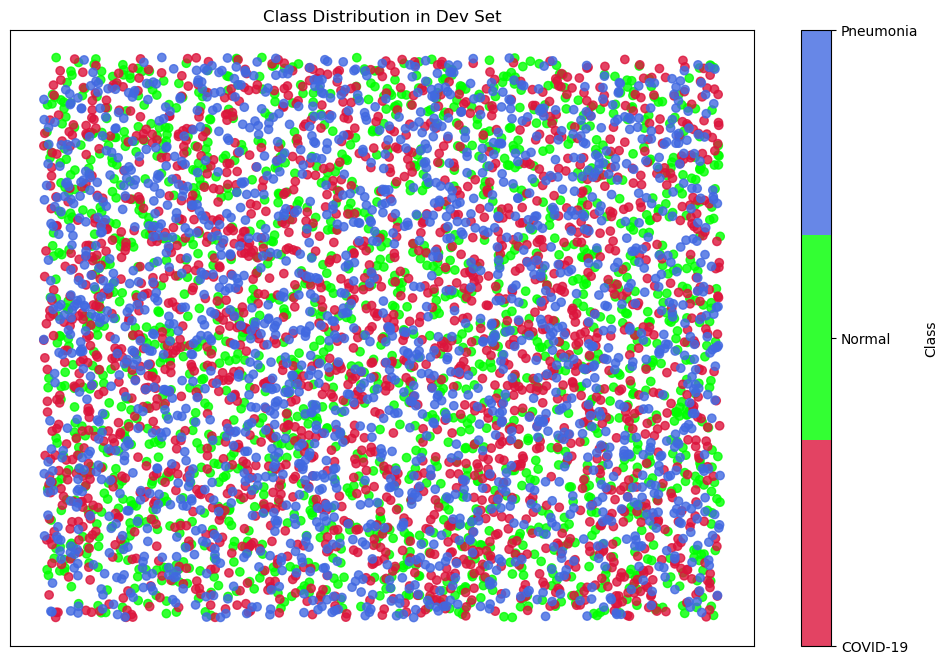

In [ ]:
# we eill visualize the distribution of the dev set
label_file = "../Covid-19/CNP_DS/dev_labels.csv"

# function to read labels from the CSV
def read_labels(file_path):
    df = pd.read_csv(file_path)
    return df["label"].tolist()

# Reading labels
labels = read_labels(label_file)

# Encoding them
encoder = LabelEncoder()
label_indices = encoder.fit_transform(labels)

# random coordinates for visualization
np.random.seed(42)
x_coords = np.random.uniform(0, 1, len(labels))
y_coords = np.random.uniform(0, 1, len(labels))

# classes' colors
colors = ['crimson', 'lime', 'royalblue']
custom_cmap = ListedColormap(colors[:len(encoder.classes_)])

# Scatter Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_coords, y_coords, c=label_indices, cmap=custom_cmap, alpha=0.8)
plt.colorbar(scatter, ticks=range(len(encoder.classes_)), label="Class").ax.set_yticklabels(encoder.classes_)
plt.xticks([])
plt.yticks([])
plt.title("Class Distribution in Dev Set")
plt.show()

# Computing Mean and STD for Normalization

<h2 style="color:mediumseagreen;">Libraries</h2>

In [ ]:
import random
import torch
from torchvision import transforms
import pandas as pd

<h2 style="color:royalblue;">Computing Mean and Standard Deviation</h2>

In [ ]:
# train labels CSV file
train_labels = pd.read_csv("../Covid-19/CNP_DS/train_labels.csv")

# Classes' ranges in the train file
normal_range = range(0, 6849)  # Indices for Normal images
covid_range = range(6849, 14507)  # for COVID images
pneumonia_range = range(14507, 21716)  # for Pneumonia images

# Shuffle and select 1000 images from each class
selected_normal = random.sample(normal_range, 1000)
selected_covid = random.sample(covid_range, 1000)
selected_pneumonia = random.sample(pneumonia_range, 1000)
selected_indices = set(selected_covid + selected_normal + selected_pneumonia)

# Loading selected images into temp_list
temp_list = []
for idx in selected_indices:
    filename = train_labels.iloc[idx]['filename']
    img_path = os.path.join('../Covid-19/CNP_DS/train', filename)
    img = Image.open(img_path)
    temp_list.append(img)

# Images to tensors
img_tensor = transforms.ToTensor()
images_as_tensors = torch.stack([img_tensor(img) for img in temp_list])

# compute mean and std
Mean = images_as_tensors.mean().item()
Std = images_as_tensors.std().item()

print(f"Mean: {Mean}")
print(f"Standard Deviation (std): {Std}")


Mean: 0.5127789974212646
Standard Deviation (std): 0.2472836971282959


# DataLoaders Setup

<h2 style="color:mediumseagreen;">Libraries</h2>

In [ ]:
from torch.utils.data import Subset, DataLoader

<h2 style="color:crimson;">Setting Up Dataloaders</h2>

In [ ]:
# Transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(Mean), std=(Std)) ])

# preparing paths of all images
train_image_paths, train_labels = prepare_dataset("../Covid-19/CNP_DS/train", "../Covid-19/CNP_DS/train_labels.csv")
dev_image_paths, dev_labels = prepare_dataset("../Covid-19/CNP_DS/dev", "../Covid-19/CNP_DS/dev_labels.csv")
test_image_paths, test_labels = prepare_dataset("../Covid-19/CNP_DS/test", "../Covid-19/CNP_DS/test_labels.csv")

# Creating datasets
train_dataset = Custom_Dataset(train_image_paths, train_labels, transform)
dev_dataset = Custom_Dataset(dev_image_paths, dev_labels, transform)
test_dataset = Custom_Dataset(test_image_paths, test_labels, transform)

# Splitting train dataset into 4 subsets
num_train_loaders = 4
train_subsets = split_dataset(train_dataset, num_train_loaders)

In [ ]:
# Creating DataLoaders
batch_size = 64
train_loaders = [DataLoader(subset, batch_size=batch_size, shuffle=True) for subset in train_subsets]
dev_loader = DataLoader(dev_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# splits and their lengths
print("Train subsets sizes:", [len(subset) for subset in train_subsets])
print("Dev set size:", len(dev_dataset))
print("Test set size:", len(test_dataset))

Train subsets sizes: [5428, 5428, 5428, 5431]
Dev set size: 5417
Test set size: 6788


# Building our Convolutional Neural Network (CNN)

<h2 style="color:mediumseagreen;">Libraries</h2>

In [ ]:
import torch.nn as nn

<h2 style="color:royalblue;">Complex Structure</h2>

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # CONVOLUTIONAL layers
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)   # First Convolutional Layer
        self.bn1 = nn.BatchNorm2d(16)                             # Batch Normalization(BN)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # Second layer
        self.bn2 = nn.BatchNorm2d(32)                             # BN

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Third layer
        self.bn3 = nn.BatchNorm2d(64)                             # BN

        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # Fourth layer
        self.bn4 = nn.BatchNorm2d(128)                            # BN

        # FULLY CONNECTED layer and CLASSIFICATION(OUTPUT) layer -----------------------------------------------------------------------------------
        self.fc = nn.Linear(32768, 128)                           # Fully Connected Dense layer  ( 512 for 32x32 and 32768 for 256x256 (fullsize) )
        self.bn_fc = nn.BatchNorm1d(128)                          # BN

        self.cl = nn.Linear(128, 3)                               # Classification/Output layer ( 3 Classes: Normal, COVID-19, Pneumonia )

        # Activation functions, Pooling, Dropout layers --------------------------------------------------------------------------------------------
        self.relu = nn.ReLU()                                     # ReLU activation function for last two
        self.leaky = nn.LeakyReLU(negative_slope=0.01)            # ReLU activation function for first two to mitigate potential Dying ReLU

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)      # Max Pooling for starting layers
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2)      # Avarage Pooling for finishing layers to prevent important info loss

        self.dropout1 = nn.Dropout(0.1)                           # after the 3rd conv. layer
        self.dropout2 = nn.Dropout(0.2)                           # after the 4th conv. layer
        self.dropout3 = nn.Dropout(0.3)                           # after the fully connected


    def forward(self, x):
        x = self.maxpool(self.leaky(self.bn1(self.conv1(x)))) # Conv1 --> BN --> Leaky ReLU --> Max Pooling
        x = self.maxpool(self.leaky(self.bn2(self.conv2(x)))) # Conv2 --> BN --> Leaky ReLU --> Max Pooling

        x = self.avgpool(self.relu(self.bn3(self.conv3(x))))  # Conv3 --> BN --> ReLU --> Avg Pooling
        x = self.dropout1(x)                                  # dropout 10 %

        x = self.avgpool(self.relu(self.bn4(self.conv4(x))))  # Conv4 --> BN --> ReLU --> Avg Pooling
        x = self.dropout2(x)                                  # dropout 20 %

        x = x.view(x.size(0), -1)                             # Flattening with correct size
        x = self.relu(self.bn_fc(self.fc(x)))                 # Fully connected layer
        x = self.dropout3(x)                                  # dropout 30 %

        x = self.cl(x)                                        # Output Layer

        return x

<h2 style="color:crimson;">Simple Structure</h2>

In [ ]:
 class simple_CNN(nn.Module):
    def __init__(self):
        super(simple_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc = nn.Linear(262144, 128) #  262144 for 256x256(fullsize) / 4096 for 32x32
        self.cl = nn.Linear(128, 3)

        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2)

        self.dropout = nn.Dropout(0.3)


    def forward(self, x):
        x = self.relu(self.conv1(x))               # Conv1 --> ReLU
        x = self.maxpool(self.relu(self.conv2(x))) # Conv2 --> ReLU --> MaxPooling
        x = self.avgpool(self.relu(self.conv3(x))) # Conv3 --> ReLU --> AvgPooling
        x = x.view(x.size(0), -1)                  # Flattening with correct size
        x = self.relu(self.fc(x))                  # Fully connected layer
        x = self.dropout(x)                        # Apply dropout
        x = self.cl(x)                             # Classification / Output layer
        return x


# Training the Model

<h2 style="color:mediumseagreen;">Libraries</h2>

In [ ]:
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score
import warnings
from sklearn.exceptions import UndefinedMetricWarning

<h2 style="color:royalblue;">Complex and Simple Models Initializing</h2>

In [ ]:
# Model, Loss function, Optimizer
model = CNN()
class_weights = torch.tensor([1.056, 0.945, 1.004])  # Normal, COVID, Pneumonia
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# CPU or GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Moving model to device
model = model.to(device)

Using device: cuda


In [ ]:
# Simple Model, Loss function, Optimizer
simple_model = simple_CNN()
class_weights = torch.tensor([1.056, 0.945, 1.004])  # Normal, COVID, Pneumonia
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer2 = optim.Adam(simple_model.parameters(), lr=0.001)

# CPU or GPU
device2 = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device2}")

# Moving simple model to device 2
simple_model = simple_model.to(device2)

Using device: cuda


<h2 style="color:crimson;">Training</h2>

<h3 style="color:white;">Training Function</h3>

In [ ]:
def train_model(model, train_loaders, dev_loader, criterion, optimizer, device, phases=4, save_path="../Covid-19/best_complex.pth"):

    # Tracking metrics for later visualization
    metrics = {
        "batch_losses": [],
        "batch_accuracies": [],
        "batch_f1_scores": [],
        "loader_train_losses": [], # average train loss per loader
        "loader_dev_losses": [],   # dev loss per train loader
        "best_f1": 0               # The best F1-score, will be used as the criterion for the BEST model
    }

    # moving criterion weights to the correct device for devices with GPUs
    if hasattr(criterion, "weight") and criterion.weight is not None:
        criterion.weight = criterion.weight.to(device)

    for phase in range(phases):
        print(f"\n\t\t\t\t<<<< Training phase [{phase+1}/{phases}] >>>>")
        for i, train_loader in enumerate(train_loaders, start=1):
            print(f"\nTraining using train_loader {i}")
            model.train()
            loader_loss = 0.0
            batch_count = 0

            with tqdm(total=len(train_loader), desc=f"Training loader {i}") as pbar:
                for images, labels in train_loader:
                    images, labels = images.to(device), labels.to(device)

                    optimizer.zero_grad()
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    # accumulating train loss for the loader
                    loader_loss += loss.item()
                    batch_count += 1

                    # Tracking train loss for the batch
                    metrics["batch_losses"].append(loss.item())

                    # computing metrics for the batch
                    _, preds = torch.max(outputs, 1)
                    batch_accuracy = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())
                    batch_f1 = f1_score(labels.cpu().numpy(), preds.cpu().numpy(), average='weighted', zero_division=0)

                    # Tracking accuracy and f1 for the batch
                    metrics["batch_accuracies"].append(batch_accuracy)
                    metrics["batch_f1_scores"].append(batch_f1)

                    # Pbar update
                    pbar.set_postfix({
                        'Loss': f"{loss.item():.4f}",
                        'Accuracy': f"{batch_accuracy:.2%}",
                        'F1': f"{batch_f1:.2%}"
                    })
                    pbar.update(1)

            # Calculating and storing average train loss for this loader
            avg_loader_loss = loader_loss / batch_count
            metrics["loader_train_losses"].append(avg_loader_loss)

            # Calculating and appending dev loss after each train-loader
            model.eval()
            dev_loss = 0.0
            with torch.no_grad():
                for dev_images, dev_labels in dev_loader:
                    dev_images, dev_labels = dev_images.to(device), dev_labels.to(device)
                    dev_outputs = model(dev_images)
                    dev_loss += criterion(dev_outputs, dev_labels).item()

            dev_loss /= len(dev_loader)  # for average dev loss
            metrics["loader_dev_losses"].append(dev_loss)

            # Calculating average F1 for this loader to check for a new best model
            avg_f1_loader = sum(metrics["batch_f1_scores"][-len(train_loader):]) / len(train_loader)
            if avg_f1_loader > metrics["best_f1"]:
                metrics["best_f1"] = avg_f1_loader
                torch.save(model.state_dict(), save_path)
                print(f"New best model saved with Average F1-Score: {avg_f1_loader:.2%}")

    return metrics

<h3 style="color:white;">Training the complex CNN</h3>

In [ ]:
metrics_complex = train_model(
    model=model,
    train_loaders=train_loaders,
    dev_loader=dev_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    phases=4,
    save_path="../Covid-19/best_complex.pth")


				<<<< Training phase [1/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:48<00:00,  1.76it/s, Loss=0.4692, Accuracy=80.77%, F1=80.75%]


New best model saved with Average F1-Score: 73.56%

Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:46<00:00,  1.84it/s, Loss=0.3560, Accuracy=84.62%, F1=84.53%]


New best model saved with Average F1-Score: 81.63%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:45<00:00,  1.88it/s, Loss=0.4860, Accuracy=80.77%, F1=80.11%]


New best model saved with Average F1-Score: 83.29%

Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:41<00:00,  2.06it/s, Loss=0.3893, Accuracy=83.64%, F1=83.93%]


New best model saved with Average F1-Score: 84.12%

				<<<< Training phase [2/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:17<00:00,  4.89it/s, Loss=0.2847, Accuracy=86.54%, F1=86.68%]


New best model saved with Average F1-Score: 85.55%

Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:16<00:00,  5.12it/s, Loss=0.3096, Accuracy=84.62%, F1=84.56%]


New best model saved with Average F1-Score: 86.96%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:16<00:00,  5.03it/s, Loss=0.4465, Accuracy=84.62%, F1=84.44%]



Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:17<00:00,  4.95it/s, Loss=0.4011, Accuracy=89.09%, F1=88.93%]



				<<<< Training phase [3/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:16<00:00,  5.14it/s, Loss=0.2915, Accuracy=88.46%, F1=88.10%]


New best model saved with Average F1-Score: 88.14%

Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:16<00:00,  5.17it/s, Loss=0.2942, Accuracy=86.54%, F1=86.29%]


New best model saved with Average F1-Score: 89.49%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:16<00:00,  5.10it/s, Loss=0.1098, Accuracy=98.08%, F1=98.09%]



Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:17<00:00,  4.85it/s, Loss=0.3568, Accuracy=89.09%, F1=89.07%]


New best model saved with Average F1-Score: 89.76%

				<<<< Training phase [4/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:16<00:00,  5.01it/s, Loss=0.3410, Accuracy=86.54%, F1=86.47%]



Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:17<00:00,  4.94it/s, Loss=0.3101, Accuracy=86.54%, F1=86.68%]


New best model saved with Average F1-Score: 90.50%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:17<00:00,  4.95it/s, Loss=0.3016, Accuracy=88.46%, F1=89.16%]


New best model saved with Average F1-Score: 90.81%

Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:18<00:00,  4.56it/s, Loss=0.4253, Accuracy=85.45%, F1=85.86%]


<h3 style="color:white;">Training the simple CNN</h3>

In [ ]:
# training the simple CNN
metrics_simple = train_model(
    model=simple_model,
    train_loaders=train_loaders,
    dev_loader=dev_loader,
    criterion=criterion,
    optimizer=optimizer2,
    device=device2,
    phases=4,
    save_path="../Covid-19/best_simple.pth")


				<<<< Training phase [1/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:24<00:00,  3.52it/s, Loss=0.6325, Accuracy=71.15%, F1=70.95%]


New best model saved with Average F1-Score: 52.49%

Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:22<00:00,  3.70it/s, Loss=0.6242, Accuracy=75.00%, F1=74.63%]


New best model saved with Average F1-Score: 68.60%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:22<00:00,  3.70it/s, Loss=0.5352, Accuracy=80.77%, F1=80.94%]


New best model saved with Average F1-Score: 75.54%

Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:23<00:00,  3.60it/s, Loss=0.6669, Accuracy=81.82%, F1=81.90%]


New best model saved with Average F1-Score: 77.16%

				<<<< Training phase [2/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:23<00:00,  3.62it/s, Loss=0.4634, Accuracy=80.77%, F1=80.76%]


New best model saved with Average F1-Score: 78.49%

Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:24<00:00,  3.51it/s, Loss=0.5918, Accuracy=76.92%, F1=76.61%]


New best model saved with Average F1-Score: 80.72%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:24<00:00,  3.52it/s, Loss=0.5917, Accuracy=76.92%, F1=76.92%]


New best model saved with Average F1-Score: 81.77%

Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:23<00:00,  3.66it/s, Loss=0.3334, Accuracy=87.27%, F1=87.53%]



				<<<< Training phase [3/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:22<00:00,  3.71it/s, Loss=0.3404, Accuracy=84.62%, F1=84.46%]


New best model saved with Average F1-Score: 83.37%

Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:23<00:00,  3.54it/s, Loss=0.3626, Accuracy=86.54%, F1=86.58%]


New best model saved with Average F1-Score: 85.31%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:22<00:00,  3.78it/s, Loss=0.4363, Accuracy=86.54%, F1=86.54%]


New best model saved with Average F1-Score: 85.91%

Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:22<00:00,  3.72it/s, Loss=0.3658, Accuracy=81.82%, F1=81.59%]



				<<<< Training phase [4/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:23<00:00,  3.56it/s, Loss=0.3139, Accuracy=88.46%, F1=88.56%]


New best model saved with Average F1-Score: 86.53%

Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:22<00:00,  3.72it/s, Loss=0.3143, Accuracy=88.46%, F1=88.49%]


New best model saved with Average F1-Score: 88.13%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:22<00:00,  3.79it/s, Loss=0.2911, Accuracy=82.69%, F1=82.89%]


New best model saved with Average F1-Score: 88.29%

Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:23<00:00,  3.65it/s, Loss=0.2546, Accuracy=87.27%, F1=87.11%]


New best model saved with Average F1-Score: 89.04%


<h2 style="color:rebeccapurple;">Results Visual</h2>

<h3 style="color:white;">Functions</h3>

In [ ]:
def average_per_interval(data, interval): # This function will be used to calculate metrics' averages over intervals
    return [np.mean(data[i:i + interval]) for i in range(0, len(data), interval)]

def metrics_plot(metrics, interval=30, title_prefix=""): # This function will be used to Plot training metrics from a given metrics dictionary(complex/simple)
    # Averaging the metrics over intervals
    smoothed_losses = average_per_interval(metrics["batch_losses"], interval)
    smoothed_accuracies = average_per_interval(metrics["batch_accuracies"], interval)
    smoothed_f1_scores = average_per_interval(metrics["batch_f1_scores"], interval)
    absolute_loss_differences = [abs(train_loss - dev_loss)
                                 for train_loss, dev_loss in zip(metrics["loader_train_losses"], metrics["loader_dev_losses"])]

    # X-Axis for intervals
    interval_batches = range(1, len(smoothed_losses) + 1)

    # Visualization
    plt.figure(figsize=(16, 12))

    # Loss
    plt.subplot(2, 2, 1)
    plt.plot(interval_batches, smoothed_losses, label='Training Loss (Averaged)', color='royalblue', marker='o')
    plt.xlabel(f"Intervals of {interval} batches")
    plt.ylabel("Loss")
    plt.title(f"{title_prefix} Training Loss per Interval")
    plt.grid(True)
    plt.legend()

    # Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(interval_batches, smoothed_accuracies, label='Accuracy (Averaged)', color='springgreen', marker='o')
    plt.xlabel(f"Intervals of {interval} batches")
    plt.ylabel("Accuracy")
    plt.title(f"{title_prefix} Training Accuracy per Interval")
    plt.grid(True)
    plt.legend()

    # F1-Score
    plt.subplot(2, 2, 3)
    plt.plot(interval_batches, smoothed_f1_scores, label='F1-Score (Averaged)', color='crimson', marker='o')
    plt.xlabel(f"Intervals of {interval} batches")
    plt.ylabel("F1-Score")
    plt.title(f"{title_prefix} Training F1-Score per Interval")
    plt.grid(True)
    plt.legend()

    # Absolute Loss Difference between train and dev per train-loader
    plt.subplot(2, 2, 4)
    plt.plot(range(1, len(absolute_loss_differences) + 1), absolute_loss_differences, label='Absolute Loss Difference', marker='o', color='orange')
    plt.xlabel("Loader")
    plt.ylabel("Absolute Loss Difference")
    plt.title(f"{title_prefix} Absolute Loss Difference per Loader |Train-Dev|")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

<h3 style="color:royalblue;">Complex CNN Results</h3>

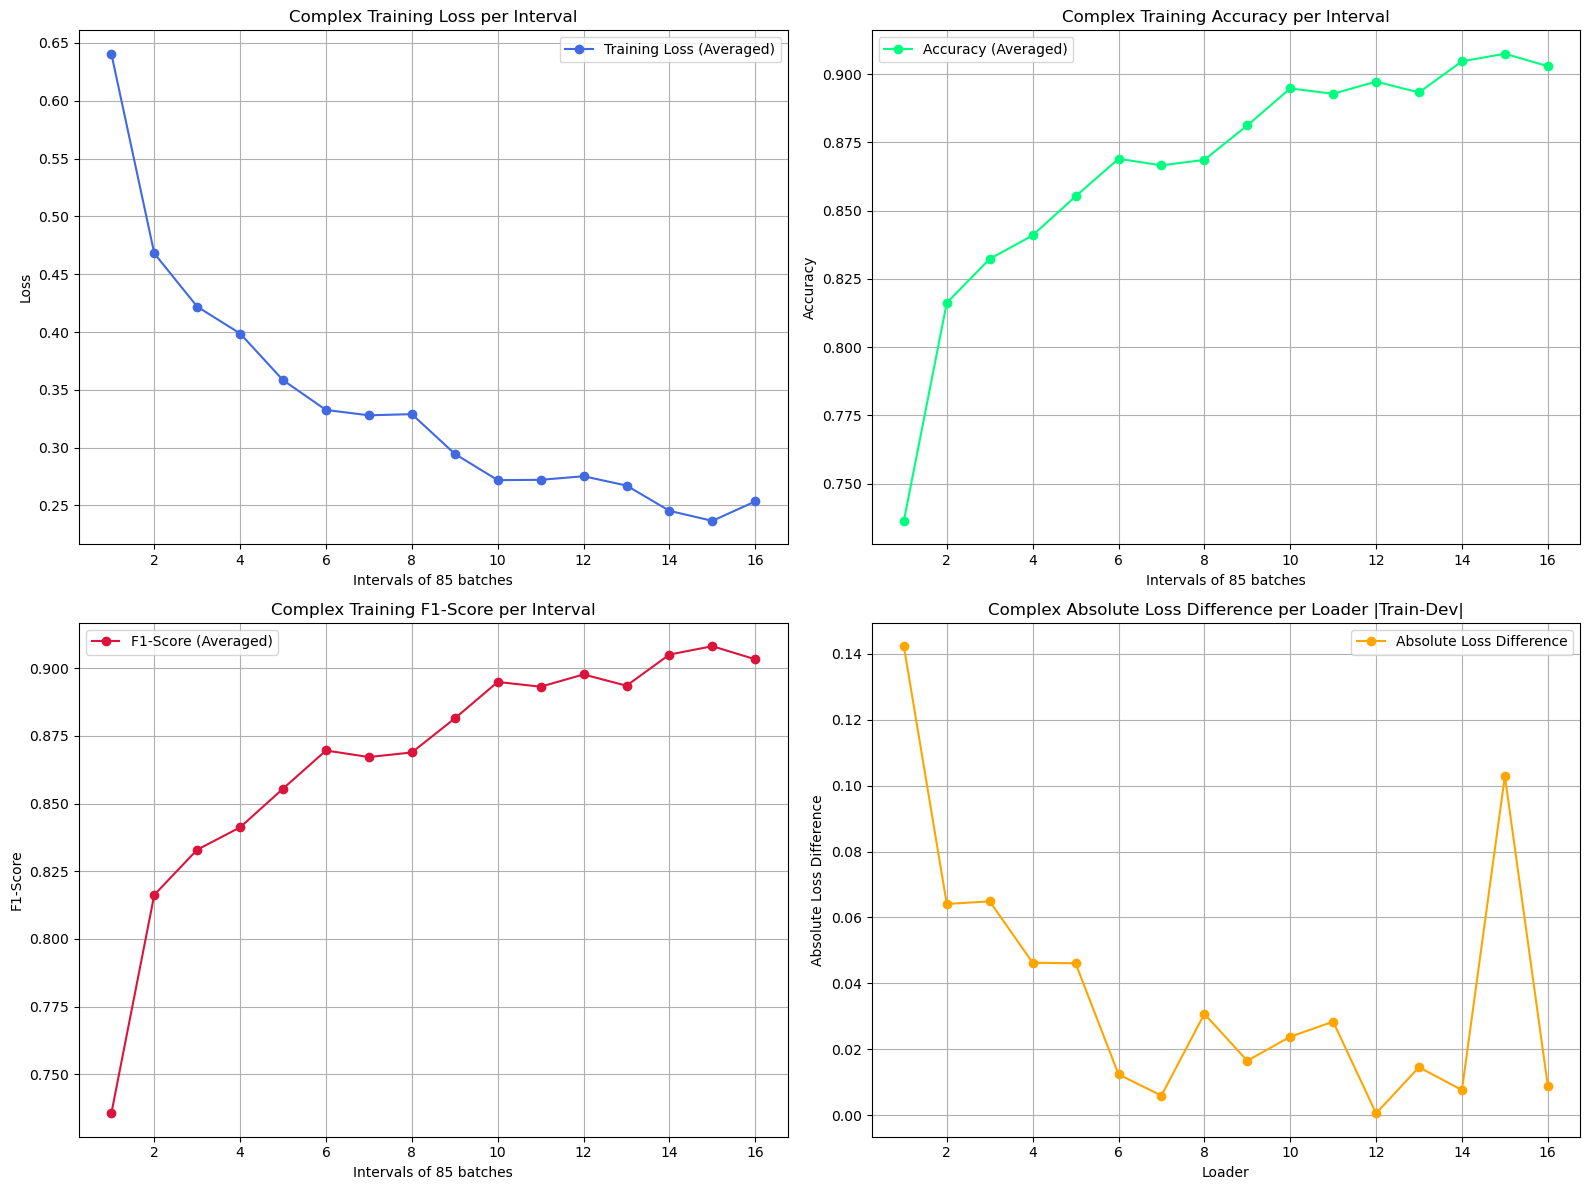

In [ ]:
metrics_plot(metrics_complex, interval=85, title_prefix="Complex") # 85 is the number of batches in each loader

<h3 style="color:crimson;">Simple CNN Results</h3>

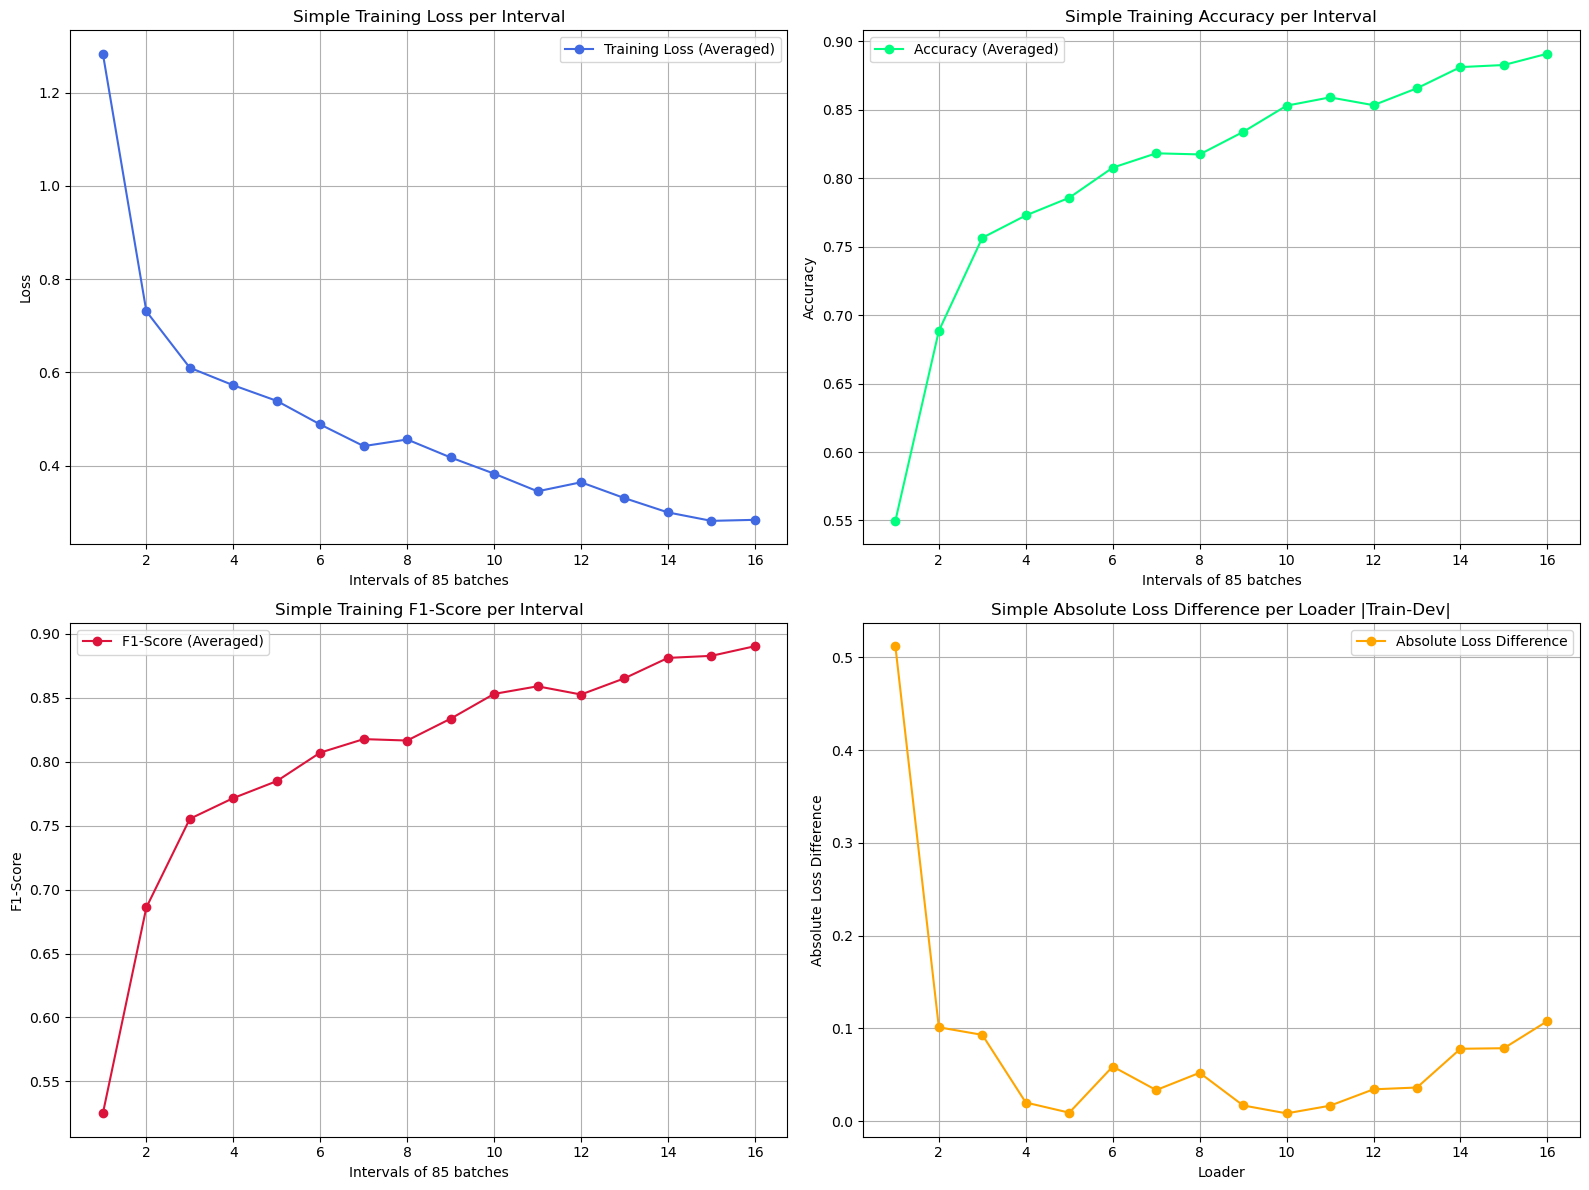

In [ ]:
metrics_plot(metrics_simple, interval=85, title_prefix="Simple")

# Hyperparameter Tuning

In [ ]:
from copy import deepcopy

<h2 style="color:mediumseagreen;">Function and Run</h2>

In [ ]:
def tuning(model, train_loaders, criterion, device,
           lrs=[0.01, 0.001],
           max_phases=4,
           optimizers=[optim.Adam, lambda params, lr: optim.SGD(params, lr=lr, momentum=0.9)],
           threshold=0.02,  # requires +2% improvement in F1 to continue onto the next training phase
           save_path="../Covid-19/best_tuned_model.pth"):

    # Tracking the best configuration of hyperparamz
    best_config = {"Learning rate": None, "Optimizer": None, "Phases": None, "F1": 0}
    global_best_f1 = 0 # Tracks the overall best F1 across all configs
    best_model_state = None

    # Moving criterion weights to the correct device for compatability with gpu
    if hasattr(criterion, "weight") and criterion.weight is not None:
        criterion.weight = criterion.weight.to(device)

    for lr in lrs:
        for optimizer_fn in optimizers:
            # Reinitializing the model and the optimizer
            tuned_model = model().to(device)
            optimizer = optimizer_fn(tuned_model.parameters(), lr=lr)
            print(f"\n\tTuning with Learning Rate = {lr}, Optimizer = {optimizer_fn.__name__}")

            # tracking each phase metrics
            phase_f1_scores = []
            current_best_f1 = 0
            for phase in range(1, max_phases + 1):
                print(f"\n\t<<<< Training Phase [{phase}/{max_phases}] >>>>")
                tuned_model.train()
                all_labels = []
                all_preds = []
                for i, train_loader in enumerate(train_loaders, start=1):
                    print(f"Training on train_loader {i}")
                    with tqdm(total=len(train_loader), desc=f"Phase {phase} Loader {i}") as pbar:
                        for images, labels in train_loader:
                            images, labels = images.to(device), labels.to(device)
                            optimizer.zero_grad()
                            outputs = tuned_model(images)
                            _, preds = torch.max(outputs, 1)
                            loss = criterion(outputs, labels)
                            loss.backward()
                            optimizer.step()
                            # for F1-score computation
                            all_labels.extend(labels.cpu().numpy())
                            all_preds.extend(preds.cpu().numpy())
                            pbar.update(1)

                # Computing F1 score for this phase
                phase_f1 = f1_score(all_labels, all_preds, average="weighted", zero_division=0)
                print(f"Phase {phase} Train F1: {phase_f1:.2%}")

                # Checking for a new best F1 (per configuration)
                if phase_f1 > current_best_f1:
                    current_best_f1 = phase_f1

                # Checking for the overall best F1
                if phase_f1 > global_best_f1:
                    global_best_f1 = phase_f1
                    best_model_state = deepcopy(tuned_model.state_dict())
                    best_config.update({"Learning rate": lr, "Optimizer": optimizer_fn.__name__, "Phases": phase, "F1": phase_f1})
                    print(f"New Best Model saved with F1: {phase_f1:.2%}")

                # Tracking phase F1 for improvement checking
                phase_f1_scores.append(phase_f1)

                # Checking for early stopping: Minimal improvement
                if 1<phase<max_phases and (phase_f1 - phase_f1_scores[phase - 2]) < threshold:
                    print(f"No significant improvement in F1 (< {threshold:.2%}). Early stopping at phase {phase}.")
                    break

    # Save the best model and configuration
    if best_model_state:
        torch.save(best_model_state, save_path)
        print(f"\nFinal Best model saved with F1: {best_config['F1']:.2%}, Learning Rate: {best_config['Learning rate']}, "
              f"Optimizer: {best_config['Optimizer']}, Phases: {best_config['Phases']}")

    return best_config

In [ ]:
deviceX = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

best_params = tuning(CNN, train_loaders, criterion, deviceX)


	Tuning with Learning Rate = 0.01, Optimizer = Adam

	<<<< Training Phase [1/4] >>>>
Training on train_loader 1


Phase 1 Loader 1: 100%|██████████| 85/85 [00:17<00:00,  4.76it/s]


Training on train_loader 2


Phase 1 Loader 2: 100%|██████████| 85/85 [00:17<00:00,  4.82it/s]


Training on train_loader 3


Phase 1 Loader 3: 100%|██████████| 85/85 [00:17<00:00,  4.91it/s]


Training on train_loader 4


Phase 1 Loader 4: 100%|██████████| 85/85 [00:17<00:00,  4.92it/s]


Phase 1 Train F1: 76.40%
New Best Model saved with F1: 76.40%

	<<<< Training Phase [2/4] >>>>
Training on train_loader 1


Phase 2 Loader 1: 100%|██████████| 85/85 [00:16<00:00,  5.02it/s]


Training on train_loader 2


Phase 2 Loader 2: 100%|██████████| 85/85 [00:17<00:00,  4.90it/s]


Training on train_loader 3


Phase 2 Loader 3: 100%|██████████| 85/85 [00:17<00:00,  4.91it/s]


Training on train_loader 4


Phase 2 Loader 4: 100%|██████████| 85/85 [00:16<00:00,  5.11it/s]


Phase 2 Train F1: 83.10%
New Best Model saved with F1: 83.10%

	<<<< Training Phase [3/4] >>>>
Training on train_loader 1


Phase 3 Loader 1: 100%|██████████| 85/85 [00:17<00:00,  4.98it/s]


Training on train_loader 2


Phase 3 Loader 2: 100%|██████████| 85/85 [00:16<00:00,  5.10it/s]


Training on train_loader 3


Phase 3 Loader 3: 100%|██████████| 85/85 [00:16<00:00,  5.03it/s]


Training on train_loader 4


Phase 3 Loader 4: 100%|██████████| 85/85 [00:17<00:00,  4.93it/s]


Phase 3 Train F1: 85.83%
New Best Model saved with F1: 85.83%

	<<<< Training Phase [4/4] >>>>
Training on train_loader 1


Phase 4 Loader 1: 100%|██████████| 85/85 [00:17<00:00,  4.98it/s]


Training on train_loader 2


Phase 4 Loader 2: 100%|██████████| 85/85 [00:16<00:00,  5.07it/s]


Training on train_loader 3


Phase 4 Loader 3: 100%|██████████| 85/85 [00:16<00:00,  5.14it/s]


Training on train_loader 4


Phase 4 Loader 4: 100%|██████████| 85/85 [00:17<00:00,  4.98it/s]


Phase 4 Train F1: 87.89%
New Best Model saved with F1: 87.89%

	Tuning with Learning Rate = 0.01, Optimizer = <lambda>

	<<<< Training Phase [1/4] >>>>
Training on train_loader 1


Phase 1 Loader 1: 100%|██████████| 85/85 [00:16<00:00,  5.09it/s]


Training on train_loader 2


Phase 1 Loader 2: 100%|██████████| 85/85 [00:16<00:00,  5.06it/s]


Training on train_loader 3


Phase 1 Loader 3: 100%|██████████| 85/85 [00:16<00:00,  5.10it/s]


Training on train_loader 4


Phase 1 Loader 4: 100%|██████████| 85/85 [00:17<00:00,  4.86it/s]


Phase 1 Train F1: 78.62%

	<<<< Training Phase [2/4] >>>>
Training on train_loader 1


Phase 2 Loader 1: 100%|██████████| 85/85 [00:23<00:00,  3.55it/s]


Training on train_loader 2


Phase 2 Loader 2: 100%|██████████| 85/85 [00:25<00:00,  3.29it/s]


Training on train_loader 3


Phase 2 Loader 3: 100%|██████████| 85/85 [00:25<00:00,  3.28it/s]


Training on train_loader 4


Phase 2 Loader 4: 100%|██████████| 85/85 [00:25<00:00,  3.28it/s]


Phase 2 Train F1: 85.00%

	<<<< Training Phase [3/4] >>>>
Training on train_loader 1


Phase 3 Loader 1: 100%|██████████| 85/85 [00:26<00:00,  3.18it/s]


Training on train_loader 2


Phase 3 Loader 2: 100%|██████████| 85/85 [00:27<00:00,  3.14it/s]


Training on train_loader 3


Phase 3 Loader 3: 100%|██████████| 85/85 [00:27<00:00,  3.13it/s]


Training on train_loader 4


Phase 3 Loader 4: 100%|██████████| 85/85 [00:26<00:00,  3.27it/s]


Phase 3 Train F1: 87.15%

	<<<< Training Phase [4/4] >>>>
Training on train_loader 1


Phase 4 Loader 1: 100%|██████████| 85/85 [00:26<00:00,  3.20it/s]


Training on train_loader 2


Phase 4 Loader 2: 100%|██████████| 85/85 [00:26<00:00,  3.25it/s]


Training on train_loader 3


Phase 4 Loader 3: 100%|██████████| 85/85 [00:27<00:00,  3.12it/s]


Training on train_loader 4


Phase 4 Loader 4: 100%|██████████| 85/85 [00:26<00:00,  3.25it/s]


Phase 4 Train F1: 88.96%
New Best Model saved with F1: 88.96%

	Tuning with Learning Rate = 0.001, Optimizer = Adam

	<<<< Training Phase [1/4] >>>>
Training on train_loader 1


Phase 1 Loader 1: 100%|██████████| 85/85 [00:25<00:00,  3.34it/s]


Training on train_loader 2


Phase 1 Loader 2: 100%|██████████| 85/85 [00:25<00:00,  3.32it/s]


Training on train_loader 3


Phase 1 Loader 3: 100%|██████████| 85/85 [00:26<00:00,  3.21it/s]


Training on train_loader 4


Phase 1 Loader 4: 100%|██████████| 85/85 [00:26<00:00,  3.26it/s]


Phase 1 Train F1: 79.68%

	<<<< Training Phase [2/4] >>>>
Training on train_loader 1


Phase 2 Loader 1: 100%|██████████| 85/85 [00:25<00:00,  3.35it/s]


Training on train_loader 2


Phase 2 Loader 2: 100%|██████████| 85/85 [00:26<00:00,  3.23it/s]


Training on train_loader 3


Phase 2 Loader 3: 100%|██████████| 85/85 [00:26<00:00,  3.27it/s]


Training on train_loader 4


Phase 2 Loader 4: 100%|██████████| 85/85 [00:26<00:00,  3.18it/s]


Phase 2 Train F1: 86.29%

	<<<< Training Phase [3/4] >>>>
Training on train_loader 1


Phase 3 Loader 1: 100%|██████████| 85/85 [00:26<00:00,  3.21it/s]


Training on train_loader 2


Phase 3 Loader 2: 100%|██████████| 85/85 [00:25<00:00,  3.29it/s]


Training on train_loader 3


Phase 3 Loader 3: 100%|██████████| 85/85 [00:25<00:00,  3.37it/s]


Training on train_loader 4


Phase 3 Loader 4: 100%|██████████| 85/85 [00:26<00:00,  3.24it/s]


Phase 3 Train F1: 88.62%

	<<<< Training Phase [4/4] >>>>
Training on train_loader 1


Phase 4 Loader 1: 100%|██████████| 85/85 [00:26<00:00,  3.23it/s]


Training on train_loader 2


Phase 4 Loader 2: 100%|██████████| 85/85 [00:25<00:00,  3.30it/s]


Training on train_loader 3


Phase 4 Loader 3: 100%|██████████| 85/85 [00:28<00:00,  2.95it/s]


Training on train_loader 4


Phase 4 Loader 4: 100%|██████████| 85/85 [00:27<00:00,  3.10it/s]


Phase 4 Train F1: 89.99%
New Best Model saved with F1: 89.99%

	Tuning with Learning Rate = 0.001, Optimizer = <lambda>

	<<<< Training Phase [1/4] >>>>
Training on train_loader 1


Phase 1 Loader 1: 100%|██████████| 85/85 [00:27<00:00,  3.13it/s]


Training on train_loader 2


Phase 1 Loader 2: 100%|██████████| 85/85 [00:29<00:00,  2.85it/s]


Training on train_loader 3


Phase 1 Loader 3: 100%|██████████| 85/85 [00:28<00:00,  2.99it/s]


Training on train_loader 4


Phase 1 Loader 4: 100%|██████████| 85/85 [00:28<00:00,  3.03it/s]


Phase 1 Train F1: 78.12%

	<<<< Training Phase [2/4] >>>>
Training on train_loader 1


Phase 2 Loader 1: 100%|██████████| 85/85 [00:29<00:00,  2.87it/s]


Training on train_loader 2


Phase 2 Loader 2: 100%|██████████| 85/85 [00:26<00:00,  3.16it/s]


Training on train_loader 3


Phase 2 Loader 3: 100%|██████████| 85/85 [00:26<00:00,  3.27it/s]


Training on train_loader 4


Phase 2 Loader 4: 100%|██████████| 85/85 [00:27<00:00,  3.12it/s]


Phase 2 Train F1: 84.58%

	<<<< Training Phase [3/4] >>>>
Training on train_loader 1


Phase 3 Loader 1: 100%|██████████| 85/85 [00:27<00:00,  3.14it/s]


Training on train_loader 2


Phase 3 Loader 2: 100%|██████████| 85/85 [00:24<00:00,  3.43it/s]


Training on train_loader 3


Phase 3 Loader 3: 100%|██████████| 85/85 [00:27<00:00,  3.04it/s]


Training on train_loader 4


Phase 3 Loader 4: 100%|██████████| 85/85 [00:26<00:00,  3.25it/s]


Phase 3 Train F1: 87.27%

	<<<< Training Phase [4/4] >>>>
Training on train_loader 1


Phase 4 Loader 1: 100%|██████████| 85/85 [00:26<00:00,  3.16it/s]


Training on train_loader 2


Phase 4 Loader 2: 100%|██████████| 85/85 [00:46<00:00,  1.85it/s]


Training on train_loader 3


Phase 4 Loader 3: 100%|██████████| 85/85 [00:47<00:00,  1.78it/s]


Training on train_loader 4


Phase 4 Loader 4: 100%|██████████| 85/85 [00:47<00:00,  1.81it/s]

Phase 4 Train F1: 88.99%

Final Best model saved with F1: 89.99%, Learning Rate: 0.001, Optimizer: Adam, Phases: 4


<h2 style="color:royalblue;">Results Analysis and Summary</h2>

### **Best `Hyperparameter` Combination/Configuration**
- `Optimizer`: **Adam**  
- `Learning Rate`: **0.001**  
- `Training Phases`: **4**

### **Key Insights**
1. **Adam Optimizer** with a `Learning Rate` of **0.001** achieved the highest Phase F1 score within **4 Phases**.
2. **Other configurations** had lower final F1 scores.
3. **Early stopping** was set to be applied whenever F1 improvements were below **2.00%**, so that there were no time wasting computations over mediocre results.

### **Conclusion**
- The tuning process results highlighted that the **best** Hyperparameters' values (`Phases`: **4**, `Optimizer`: **Adam**, `Learning Rate`: **0.001**) were the same vlaues we used to train our model previously, thus there won't be any change or re-runs.
- Any Training or Evaluation process we will go through later on will be with the same (*best*) hyperparams' values.


# Evaluating on Dev and Test Sets

<h2 style="color:mediumseagreen;">Libraries</h2>

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

<h2 style="color:orangered;">Preparations</h2>

In [ ]:
# For test set confusion matrix visuals, we will pass them as params in the fuction call
cmplx_real, cmplx_pred = [], []
smpl_real, smpl_pred = [], []

# Evaluation function to evaluate on dev/test sets
def evaluate(model, loader, criterion, device, desc="Evaluating", test=False, real_labels=None, pred_labels=None):

    model.eval()  # evaluation mode
    total_loss = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        with tqdm(total=len(loader), desc=desc, unit="batch") as pbar:
            for images, labels in loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())
                pbar.update(1)

    loader_loss = total_loss / len(loader)
    loader_accuracy = accuracy_score(all_labels, all_preds)
    loader_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    loader_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    if test and real_labels is not None and pred_labels is not None:
        real_labels.extend(all_labels)
        pred_labels.extend(all_preds)

    print(f"Loss: {loader_loss:.4f} | Accuracy: {loader_accuracy:.4f} | Precision: {loader_precision:.4f} | F1-Score: {loader_f1:.4f}\n")

In [ ]:
# Paths to saved models
complex_model_path = "../Covid-19/best_complex.pth"
simple_model_path = "../Covid-19/best_simple.pth"

# Suppressing this specific warning from torch.load
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        category=FutureWarning,
        message=r"You are using `torch.load` with `weights_only=False`.*")
    # Load models
    model.load_state_dict(torch.load(complex_model_path))
    simple_model.load_state_dict(torch.load(simple_model_path))

<h2 style="color:royalblue;">Evaluating</h2>

<h3 style="color:white;">Complex on Dev and Test Sets</h3>

In [ ]:
print("\tEvaluation on Dev Loader for Complex Model:")
evaluate(model, dev_loader, criterion, device, desc="Evaluating on Dev Loader (Complex)")

print("\n\tEvaluation on Test Loader for Complex Model:")
evaluate(model, test_loader, criterion, device, desc="Evaluating on Test Loader (Complex)",
         test=True, real_labels=cmplx_real, pred_labels=cmplx_pred)

	Evaluation on Dev Loader for Complex Model:


Evaluating on Dev Loader (Complex): 100%|██████████| 85/85 [00:48<00:00,  1.77batch/s]


Loss: 0.3396 | Accuracy: 0.8630 | Precision: 0.8831 | F1-Score: 0.8650


	Evaluation on Test Loader for Complex Model:


Evaluating on Test Loader (Complex): 100%|██████████| 107/107 [01:25<00:00,  1.25batch/s]

Loss: 0.3152 | Accuracy: 0.8791 | Precision: 0.8956 | F1-Score: 0.8808



<h3 style="color:lightgray;">Simple on Dev and Test Sets</h3>

In [ ]:
print("\tEvaluation on Dev Loader for Simple Model:")
evaluate(simple_model, dev_loader, criterion, device2, desc="Evaluating on Dev Loader (Simple)")

print("\n\tEvaluation on Test Loader for Simple Model:")
evaluate(simple_model, test_loader, criterion, device2, desc="Evaluating on Test Loader (Simple)",
         test=True, real_labels=smpl_real, pred_labels=smpl_pred)

	Evaluation on Dev Loader for Simple Model:


Evaluating on Dev Loader (Simple): 100%|██████████| 85/85 [00:45<00:00,  1.87batch/s]


Loss: 0.3919 | Accuracy: 0.8518 | Precision: 0.8520 | F1-Score: 0.8508


	Evaluation on Test Loader for Simple Model:


Evaluating on Test Loader (Simple): 100%|██████████| 107/107 [00:59<00:00,  1.81batch/s]

Loss: 0.3427 | Accuracy: 0.8704 | Precision: 0.8710 | F1-Score: 0.8701



<h2 style="color:rebeccapurple;">Visuals</h2>

<h3 style="color:white;">Complex Confusion Matrix</h3>

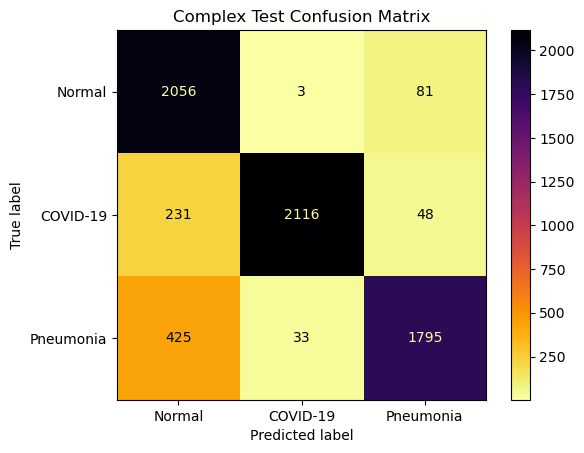

In [ ]:
# Confusion Matrix Complex Model testing
cmplx_cm = confusion_matrix(cmplx_real, cmplx_pred)
class_names = ["Normal", "COVID-19", "Pneumonia"]
disp = ConfusionMatrixDisplay(cmplx_cm, display_labels=class_names)
disp.plot(cmap='inferno_r')
plt.title("Complex Test Confusion Matrix")
plt.show()

<h3 style="color:white;">Simple Confusion Matrix</h3>

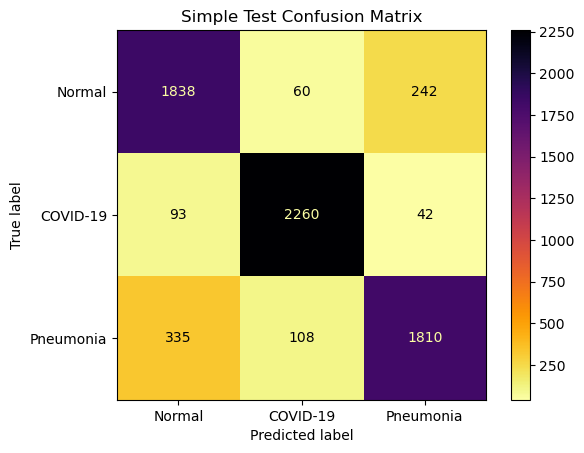

In [ ]:
# Confusion Matrix Simple Model testing
smpl_cm = confusion_matrix(smpl_real, smpl_pred)
disp = ConfusionMatrixDisplay(smpl_cm, display_labels=class_names)
disp.plot(cmap='inferno_r')
plt.title("Simple Test Confusion Matrix")
plt.show()

<h3 style="color:lightblue;">Complex Per Class Metrics</h3>

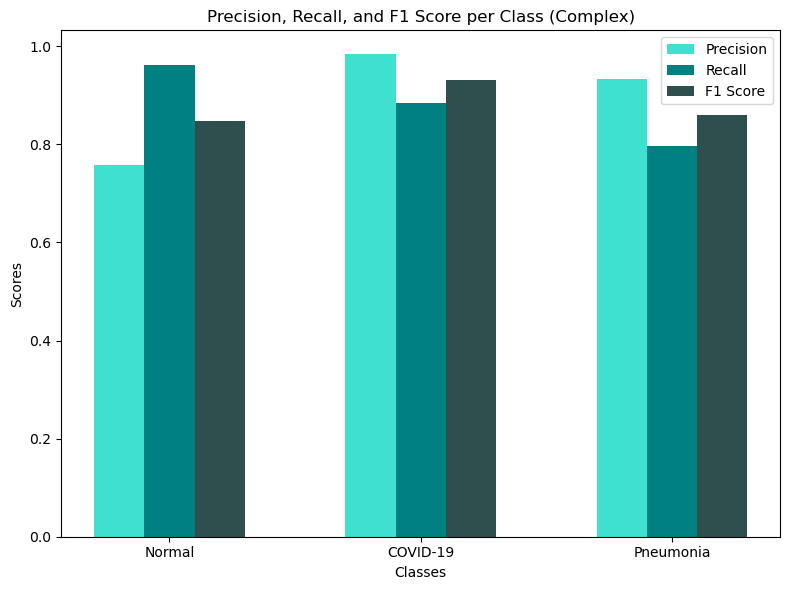

In [ ]:
# Calculating precision, recall, f1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(cmplx_real, cmplx_pred)

# Plotting
x = np.arange(len(class_names))
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2
# precision, recall, and f1 score bars
ax.bar(x - width, precision, width, label='Precision', color='turquoise')
ax.bar(x, recall, width, label='Recall', color='teal')
ax.bar(x + width, f1, width, label='F1 Score', color='darkslategray')
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score per Class (Complex)')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
plt.tight_layout()
plt.show()


<h3 style="color:lightpink;">Simple Per Class Metrics</h3>

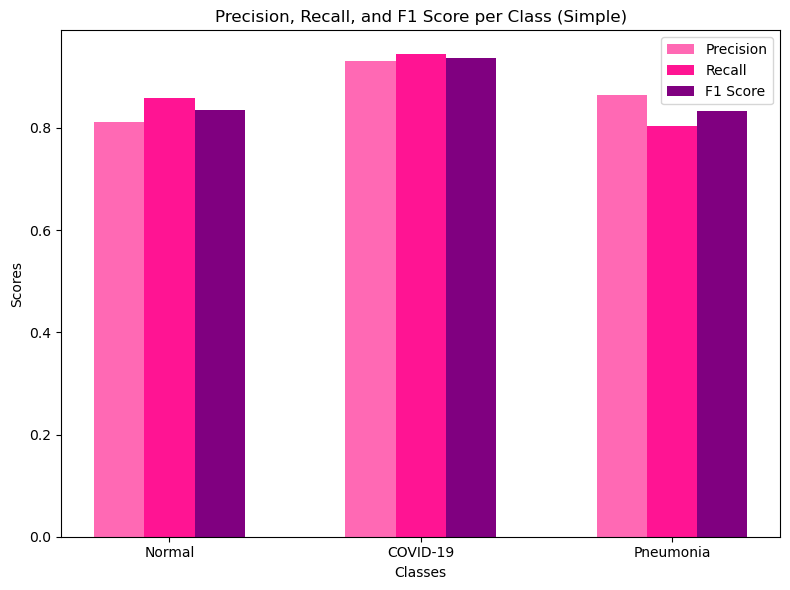

In [ ]:
# Calculating precision, recall, f1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(smpl_real, smpl_pred)

# Plotting
x = np.arange(len(class_names))
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2
# precision, recall, and f1 score bars
ax.bar(x - width, precision, width, label='Precision', color='hotpink')
ax.bar(x, recall, width, label='Recall', color='deeppink')
ax.bar(x + width, f1, width, label='F1 Score', color='purple')
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score per Class (Simple)')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
plt.tight_layout()
plt.show()


# Convolutional Layers Feature Maps Visualization

<h2 style="color:mediumseagreen;">Modified CNN Classes</h2>

<h3 style="color:white;">Complex CNN</h3>

In [ ]:
class CNN_FM(nn.Module):
    def __init__(self):
        super(CNN_FM, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.fc = nn.Linear(32768, 128)
        self.bn_fc = nn.BatchNorm1d(128)
        self.cl = nn.Linear(128, 3)
        self.relu = nn.ReLU()
        self.leaky = nn.LeakyReLU(negative_slope=0.01)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.1)
        self.dropout2 = nn.Dropout(0.2)
        self.dropout3 = nn.Dropout(0.3)

    def forward(self, x):
        feature_maps = {}

        x = self.maxpool(self.leaky(self.bn1(self.conv1(x))))
        feature_maps['conv1'] = x

        x = self.maxpool(self.leaky(self.bn2(self.conv2(x))))
        feature_maps['conv2'] = x

        x = self.avgpool(self.relu(self.bn3(self.conv3(x))))
        feature_maps['conv3'] = x
        x = self.dropout1(x)

        x = self.avgpool(self.relu(self.bn4(self.conv4(x))))
        feature_maps['conv4'] = x
        x = self.dropout2(x)

        x = x.view(x.size(0), -1)
        x = self.relu(self.bn_fc(self.fc(x)))
        x = self.dropout3(x)
        output = self.cl(x)

        return output, feature_maps

<h3 style="color:white;">Simple CNN</h3>

In [ ]:
class simple_CNN_FM(nn.Module):
    def __init__(self):
        super(simple_CNN_FM, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc = nn.Linear(262144, 128)
        self.cl = nn.Linear(128, 3)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        feature_maps = {}

        x = self.relu(self.conv1(x))
        feature_maps['conv1'] = x

        x = self.maxpool(self.relu(self.conv2(x)))
        feature_maps['conv2'] = x

        x = self.avgpool(self.relu(self.conv3(x)))
        feature_maps['conv3'] = x

        x = x.view(x.size(0), -1)
        x = self.relu(self.fc(x))
        x = self.dropout(x)
        output = self.cl(x)

        return output, feature_maps

<h2 style="color:royalblue;">Visualizing Function</h2>

In [ ]:
def visualize_FM(model, images, layers_num, labels, class_names, std, mean):
    model.eval()
    num_images = len(images)
    num_layers = layers_num
    layers = [module for module in model.children() if isinstance(module, torch.nn.Conv2d)]

    fig, axes = plt.subplots(num_images, 2 + num_layers, figsize=(15, 3.5 * num_images))

    for img_idx, (img, label) in enumerate(zip(images, labels)):
        # Unnormalize the image
        unnormalized_img = img.clone() * std + mean
        unnormalized_img = unnormalized_img.squeeze(0).detach().numpy()

        # Normalized image
        normalized_img = img.squeeze(0).detach().numpy()

        # (Original) unnormalized image
        axes[img_idx, 0].imshow(unnormalized_img, cmap="gray")
        axes[img_idx, 0].set_title(f"({class_names[label]}) Original")
        axes[img_idx, 0].axis("off")

        # normalized image
        axes[img_idx, 1].imshow(normalized_img, cmap="gray")
        axes[img_idx, 1].set_title("Normalized")
        axes[img_idx, 1].axis("off")

        # forward pass to get the feature maps
        x = img.unsqueeze(0)  # Add batch dimension
        for layer_idx, layer in enumerate(layers):
            x = layer(x)
            fmap_grid = x.squeeze(0).detach().numpy() # Converting feature maps to a grid
            fmap_sum = fmap_grid.sum(axis=0) # Summing across channels for visualization

            # feature maps
            axes[img_idx, layer_idx + 2].imshow(fmap_sum, cmap="inferno")
            axes[img_idx, layer_idx + 2].set_title(f"Conv{layer_idx + 1}")
            axes[img_idx, layer_idx + 2].axis("off")

    plt.tight_layout()
    plt.show()

<h2 style="color:rebeccapurple;">Visuals</h2>

<h3 style="color:white;">Preparations</h3>

In [ ]:
picked_indices = [0, 2345, 5678]   # Normal, COVID-19, Pneumonia
# Extracting 3 images (each class) and their labels
TST_images = [test_loader.dataset[idx][0] for idx in picked_indices]
TST_labels = [test_loader.dataset[idx][1] for idx in picked_indices]

cmplx_fm_model = CNN_FM()

In [ ]:
smpl_fm_model = simple_CNN_FM()

<h3 style="color:dodgerblue;">Complex Model FM</h3>

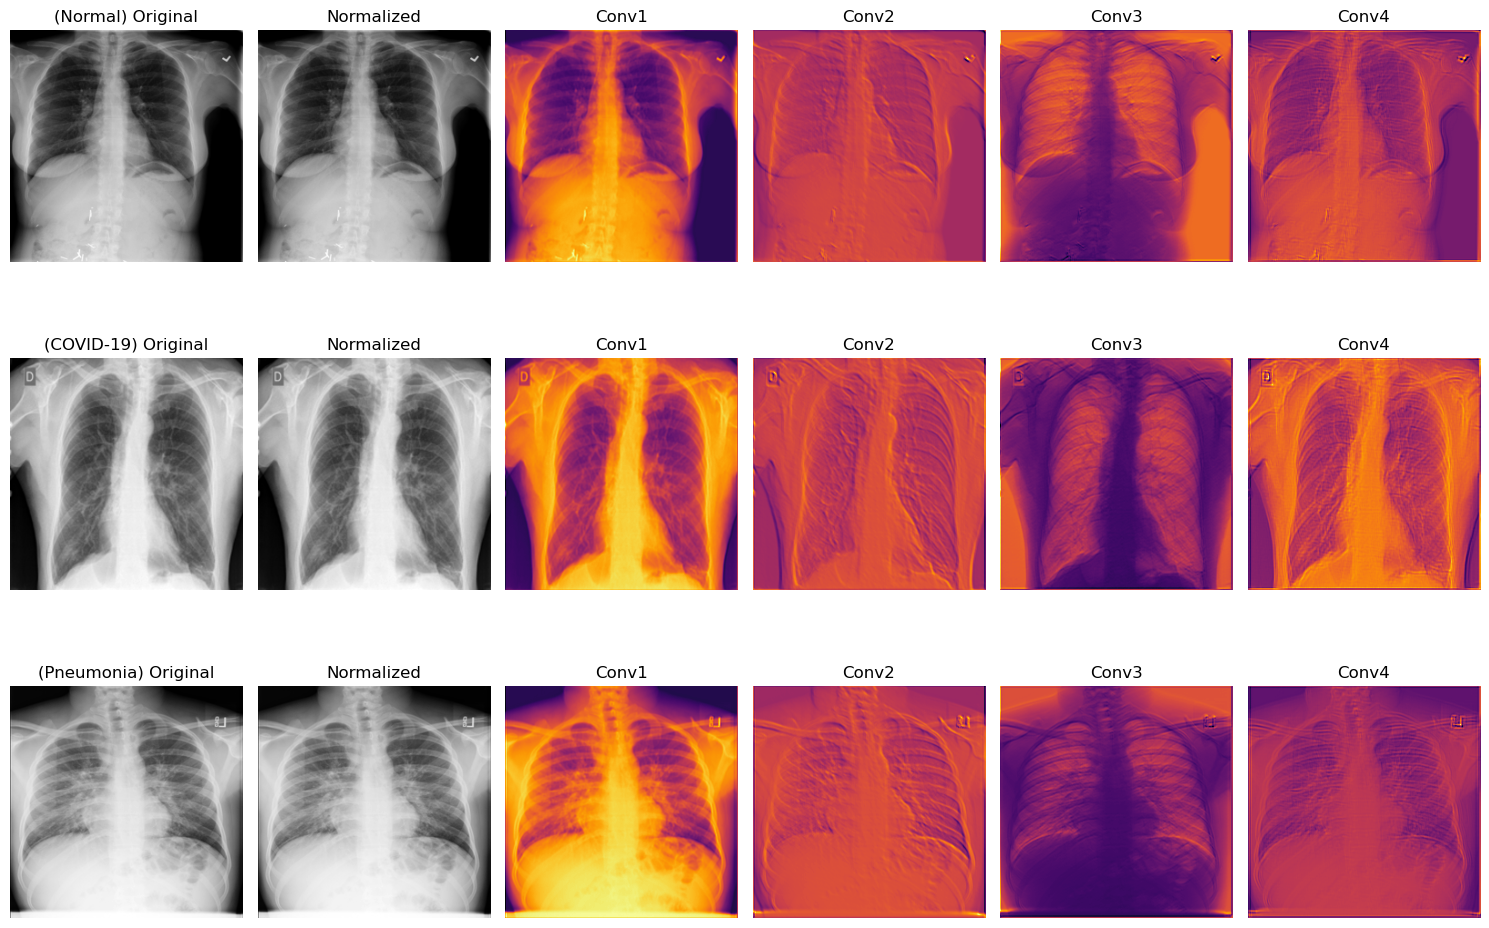

In [ ]:
visualize_FM(cmplx_fm_model, TST_images, 4, TST_labels, class_names, Std, Mean)

<h3 style="color:crimson;">Simple Model FM</h3>

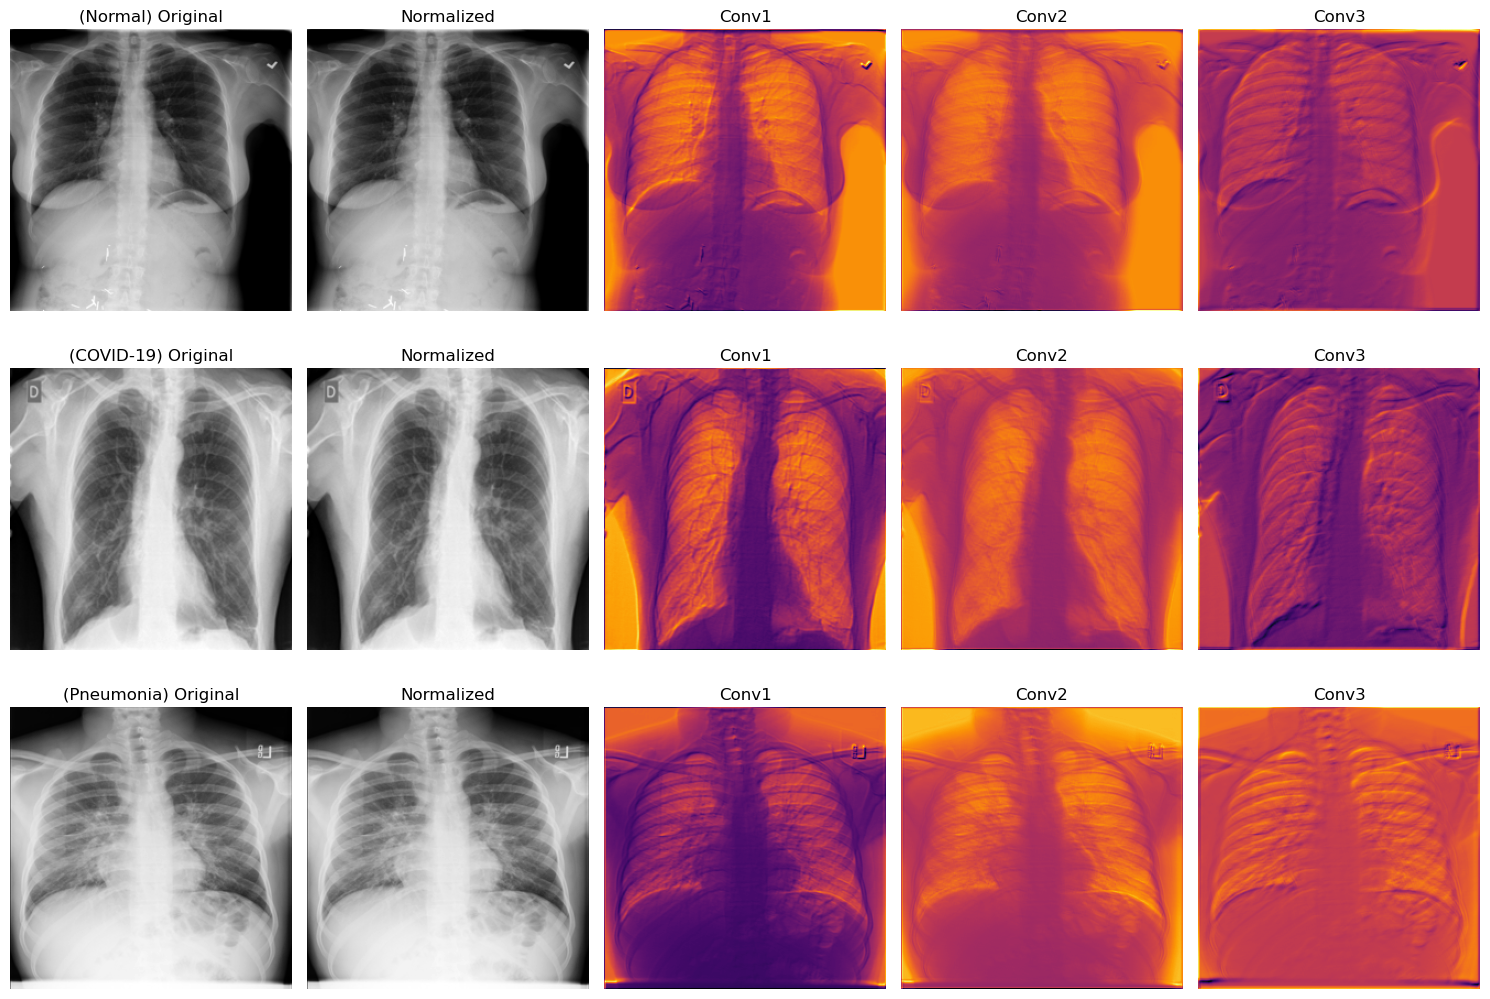

In [ ]:
visualize_FM(smpl_fm_model, TST_images, 3, TST_labels, class_names, Std, Mean)

# Attempting Data Augmentation to Boost Performance

<h2 style="color:mediumseagreen;">Augmented Transform and a New Train DataLoader</h2>

In [ ]:
# Augmented Transformation
AUG_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),                           # Random horizontal flipping
    transforms.RandomRotation(degrees=20),                            # Random Rotating with 20± degrees
    transforms.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0)),  # Random Cropping and resizin
    transforms.ToTensor(),
    transforms.Normalize(mean=(Mean), std=(Std)) ])

# Creating a new train dataset with Augmentations / dev and test remain the same
AUG_train_dataset = Custom_Dataset(train_image_paths, train_labels, AUG_transform)

# Splitting the new train dataset into 4 subsets
num_train_loaders = 4
AUG_train_subsets = split_dataset(AUG_train_dataset, num_train_loaders)

# Creating a new DataLoader for the new train subsets
batch_size = 64
AUG_train_loaders = [DataLoader(subset, batch_size=batch_size, shuffle=True) for subset in AUG_train_subsets]

<h2 style="color:royalblue;">Training on The Augmented TrainLoaders</h2>

<h3 style="color:lightblue;">Initializing and Training The Complex Model</h3>

In [ ]:
aug_model = CNN()
criterion = nn.CrossEntropyLoss(weight=class_weights)
aug_optimizer = optim.Adam(aug_model.parameters(), lr=0.001)
aug_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {aug_device}")
aug_model = aug_model.to(aug_device)

Using device: cuda


In [ ]:
aug_metrics_complex = train_model(
    model=aug_model,
    train_loaders=AUG_train_loaders,
    dev_loader=dev_loader,
    criterion=criterion,
    optimizer=aug_optimizer,
    device=aug_device,
    phases=4,
    save_path="../Covid-19/aug_best_complex.pth")


				<<<< Training phase [1/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [01:07<00:00,  1.26it/s, Loss=0.7541, Accuracy=65.38%, F1=65.84%]


New best model saved with Average F1-Score: 61.78%

Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [01:07<00:00,  1.26it/s, Loss=0.5893, Accuracy=73.08%, F1=73.48%]


New best model saved with Average F1-Score: 68.61%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [01:12<00:00,  1.18it/s, Loss=0.7766, Accuracy=75.00%, F1=75.34%]


New best model saved with Average F1-Score: 71.54%

Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [01:29<00:00,  1.06s/it, Loss=0.7275, Accuracy=72.73%, F1=72.95%]


New best model saved with Average F1-Score: 74.93%

				<<<< Training phase [2/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [01:41<00:00,  1.19s/it, Loss=0.7231, Accuracy=69.23%, F1=69.25%]



Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [01:49<00:00,  1.29s/it, Loss=0.5533, Accuracy=76.92%, F1=76.91%]


New best model saved with Average F1-Score: 75.93%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [01:45<00:00,  1.24s/it, Loss=0.6384, Accuracy=73.08%, F1=73.30%]


New best model saved with Average F1-Score: 76.74%

Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [01:22<00:00,  1.03it/s, Loss=0.5514, Accuracy=74.55%, F1=74.91%]


New best model saved with Average F1-Score: 79.22%

				<<<< Training phase [3/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [01:04<00:00,  1.32it/s, Loss=0.3984, Accuracy=88.46%, F1=88.45%]



Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:30<00:00,  2.77it/s, Loss=0.6914, Accuracy=75.00%, F1=74.53%]


New best model saved with Average F1-Score: 80.48%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:31<00:00,  2.70it/s, Loss=0.5466, Accuracy=76.92%, F1=77.02%]



Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:30<00:00,  2.75it/s, Loss=0.5901, Accuracy=80.00%, F1=80.02%]


New best model saved with Average F1-Score: 81.35%

				<<<< Training phase [4/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:30<00:00,  2.78it/s, Loss=0.6256, Accuracy=78.85%, F1=78.38%]



Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:29<00:00,  2.86it/s, Loss=0.3662, Accuracy=84.62%, F1=84.79%]


New best model saved with Average F1-Score: 81.38%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:29<00:00,  2.84it/s, Loss=0.4369, Accuracy=82.69%, F1=82.84%]



Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:29<00:00,  2.84it/s, Loss=0.3281, Accuracy=89.09%, F1=89.21%]


New best model saved with Average F1-Score: 83.11%


<h3 style="color:lightcoral;">Initializing and Training The Simple Model</h3>

In [ ]:
aug_simple_model = simple_CNN()
aug_optimizer2 = optim.Adam(aug_simple_model.parameters(), lr=0.001)
aug_device2 = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {aug_device2}")
aug_simple_model = aug_simple_model.to(aug_device2)

Using device: cuda


In [ ]:
aug_metrics_simple = train_model(
    model=aug_simple_model,
    train_loaders=AUG_train_loaders,
    dev_loader=dev_loader,
    criterion=criterion,
    optimizer=aug_optimizer2,
    device=aug_device2,
    phases=4,
    save_path="../Covid-19/aug_best_simple.pth")


				<<<< Training phase [1/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:38<00:00,  2.22it/s, Loss=0.8808, Accuracy=63.46%, F1=62.59%]


New best model saved with Average F1-Score: 47.59%

Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:36<00:00,  2.32it/s, Loss=0.8643, Accuracy=55.77%, F1=55.55%]


New best model saved with Average F1-Score: 58.33%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:35<00:00,  2.39it/s, Loss=0.9669, Accuracy=51.92%, F1=52.49%]


New best model saved with Average F1-Score: 61.35%

Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:36<00:00,  2.36it/s, Loss=0.7335, Accuracy=56.36%, F1=56.22%]


New best model saved with Average F1-Score: 64.61%

				<<<< Training phase [2/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:36<00:00,  2.36it/s, Loss=0.6662, Accuracy=71.15%, F1=71.08%]


New best model saved with Average F1-Score: 65.33%

Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:35<00:00,  2.37it/s, Loss=0.6318, Accuracy=76.92%, F1=76.92%]


New best model saved with Average F1-Score: 66.12%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:36<00:00,  2.35it/s, Loss=0.7536, Accuracy=59.62%, F1=59.35%]



Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:37<00:00,  2.29it/s, Loss=0.6385, Accuracy=70.91%, F1=70.98%]


New best model saved with Average F1-Score: 68.57%

				<<<< Training phase [3/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:27<00:00,  3.11it/s, Loss=0.7650, Accuracy=67.31%, F1=66.25%]


New best model saved with Average F1-Score: 68.71%

Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:26<00:00,  3.19it/s, Loss=0.6746, Accuracy=75.00%, F1=75.59%]


New best model saved with Average F1-Score: 68.78%

Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:26<00:00,  3.19it/s, Loss=0.7895, Accuracy=65.38%, F1=65.63%]



Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:26<00:00,  3.22it/s, Loss=0.7007, Accuracy=72.73%, F1=72.74%]


New best model saved with Average F1-Score: 70.63%

				<<<< Training phase [4/4] >>>>

Training using train_loader 1


Training loader 1: 100%|██████████| 85/85 [00:26<00:00,  3.17it/s, Loss=0.6201, Accuracy=75.00%, F1=74.38%]


New best model saved with Average F1-Score: 70.75%

Training using train_loader 2


Training loader 2: 100%|██████████| 85/85 [00:26<00:00,  3.16it/s, Loss=0.5643, Accuracy=76.92%, F1=75.76%]



Training using train_loader 3


Training loader 3: 100%|██████████| 85/85 [00:27<00:00,  3.12it/s, Loss=0.6304, Accuracy=73.08%, F1=72.79%]



Training using train_loader 4


Training loader 4: 100%|██████████| 85/85 [00:27<00:00,  3.05it/s, Loss=0.5520, Accuracy=72.73%, F1=71.89%]


New best model saved with Average F1-Score: 71.59%


<h2 style="color:crimson;">Evaluating on Test Sets</h2>

<h3 style="color:lightblue;">Evaluating The Complex Model</h3>

In [ ]:
aug_cmplx_real, aug_cmplx_pred = [], []
print("\tEvaluation on Test Loader for Complex Model:")
evaluate(aug_model, test_loader, criterion, aug_device, desc="Evaluating on Test Loader (Complex)",
         test=True, real_labels=aug_cmplx_real, pred_labels=aug_cmplx_pred)

	Evaluation on Test Loader for Complex Model:


Evaluating on Test Loader (Complex): 100%|██████████| 107/107 [01:00<00:00,  1.76batch/s]

Loss: 0.3606 | Accuracy: 0.8659 | Precision: 0.8713 | F1-Score: 0.8663



<h3 style="color:lightcoral;">Evaluating The Simple Model</h3>

In [ ]:
aug_smpl_real, aug_smpl_pred = [], []
print("\tEvaluation on Test Loader for Simple Model:")
evaluate(aug_simple_model, test_loader, criterion, aug_device2, desc="Evaluating on Test Loader (Simple)",
         test=True, real_labels=aug_smpl_real, pred_labels=aug_smpl_pred)

	Evaluation on Test Loader for Simple Model:


Evaluating on Test Loader (Simple): 100%|██████████| 107/107 [00:16<00:00,  6.44batch/s]

Loss: 0.5856 | Accuracy: 0.7608 | Precision: 0.7823 | F1-Score: 0.7583



<h2 style="color:rebeccapurple;">Visuals</h2>

<h3 style="color:royalblue;">Training Metrics Visuals</h3>

<h4 style="color:white;">Complex</h4>

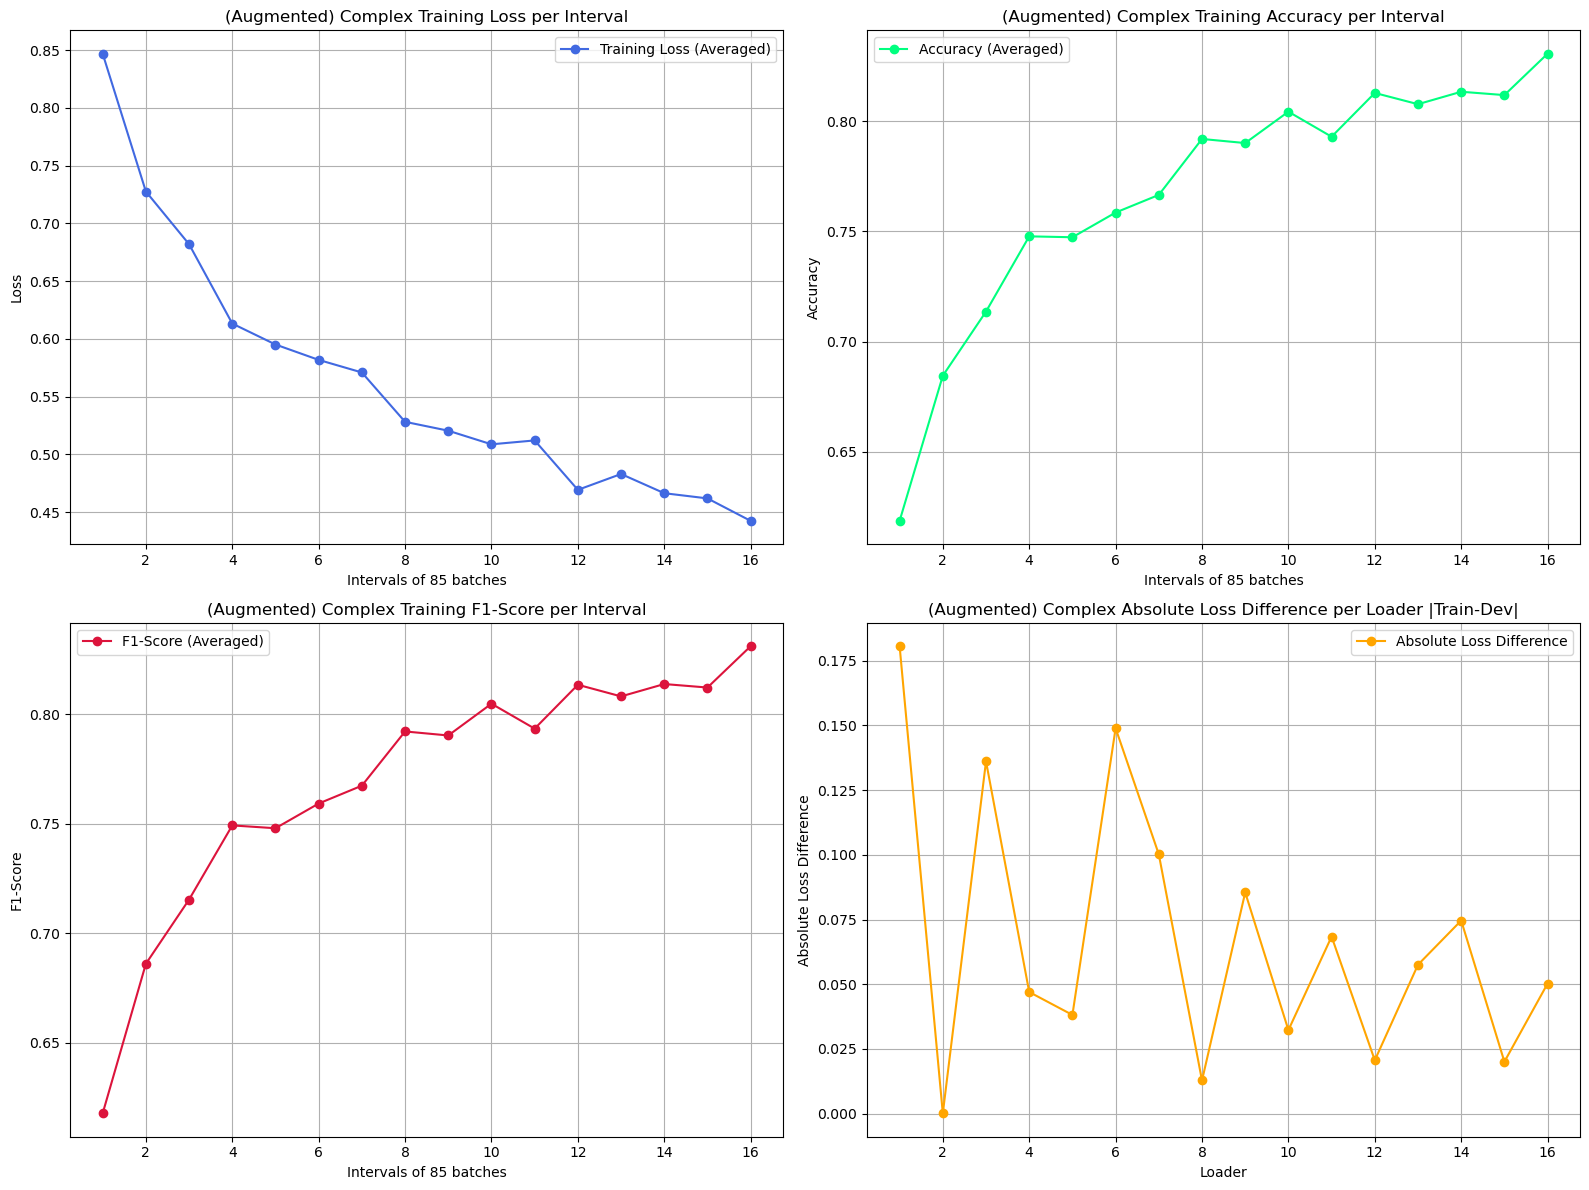

In [ ]:
metrics_plot(aug_metrics_complex, interval=85, title_prefix="(Augmented) Complex")

<h4 style="color:white;">Simple</h4>

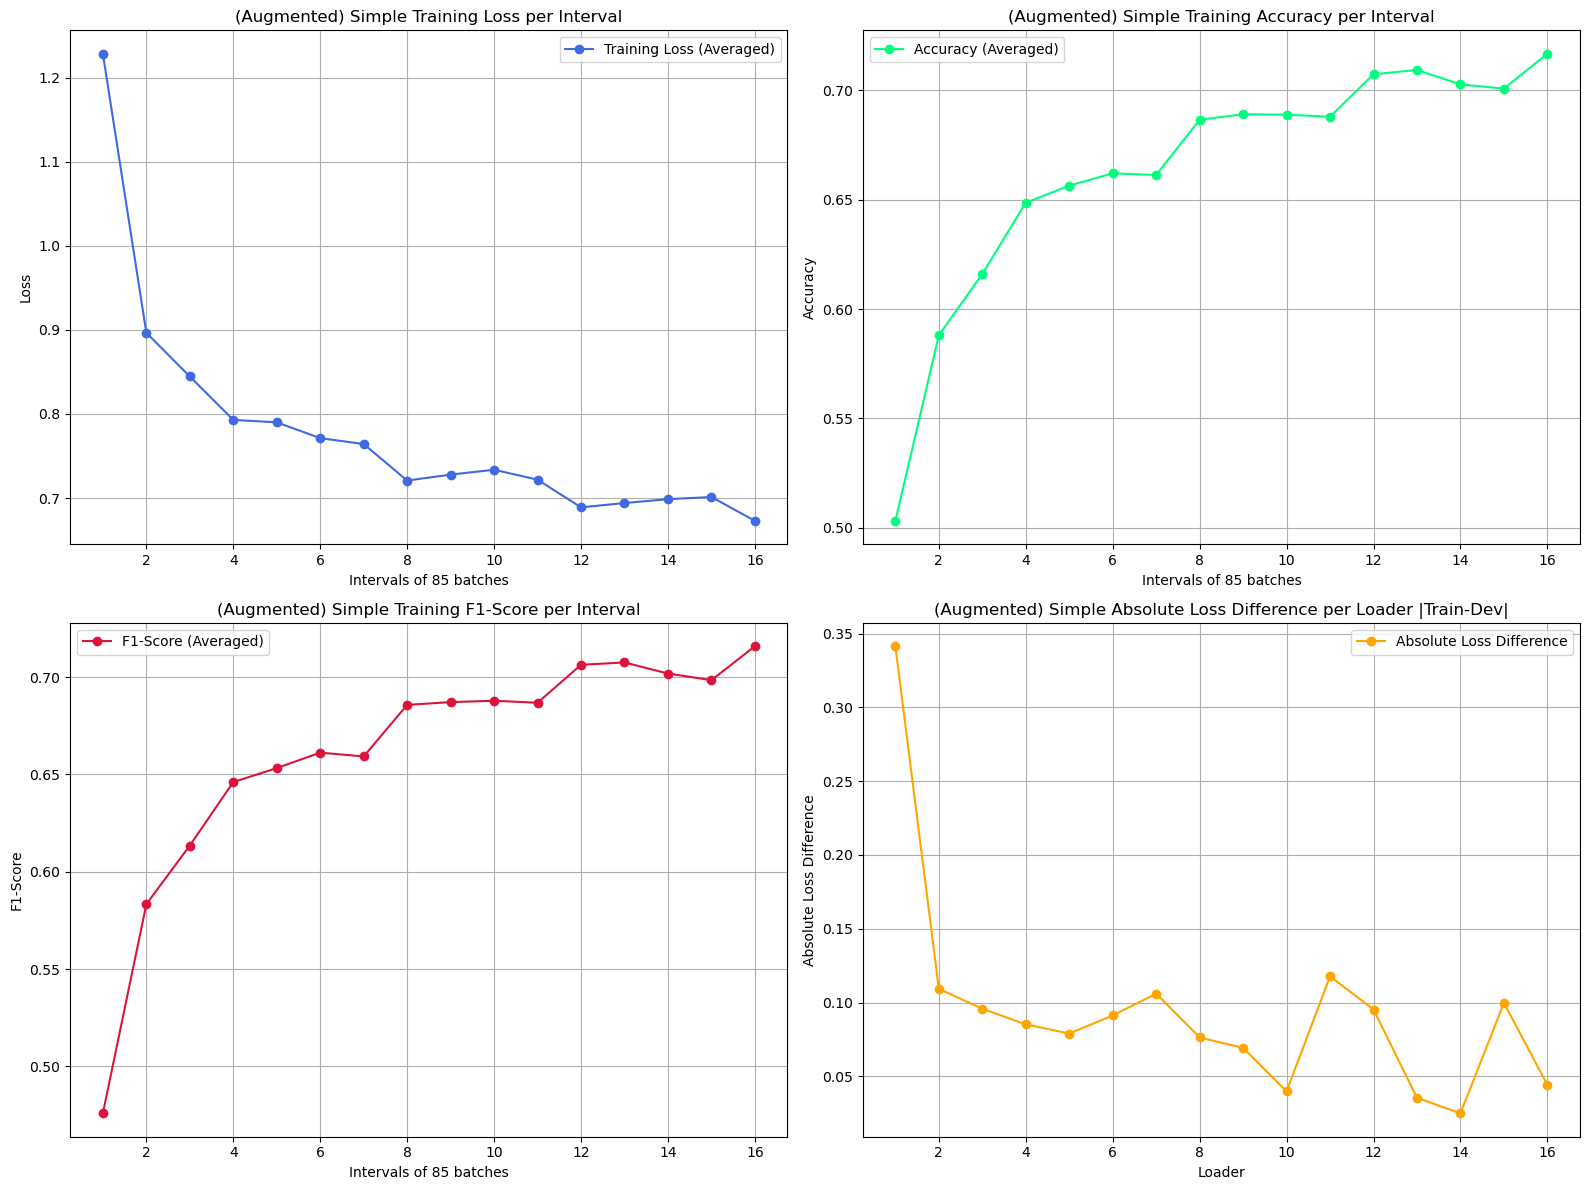

In [ ]:
metrics_plot(aug_metrics_simple, interval=85, title_prefix="(Augmented) Simple")

<h3 style="color:crimson;">Evaluating Visuals</h3>

<h4 style="color:white;">Complex Confusion Matrix</h4>

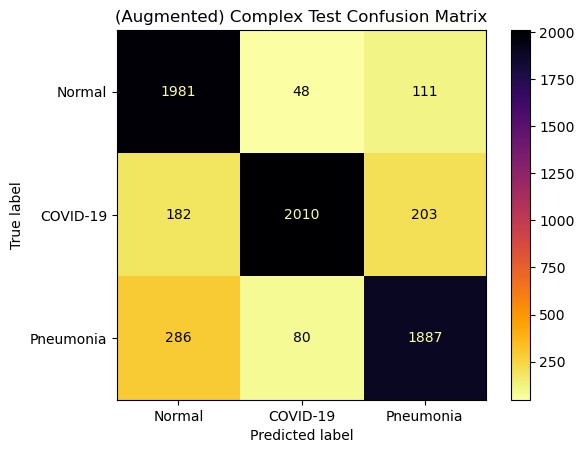

In [ ]:
# Confusion Matrix Complex Model testing
aug_cmplx_cm = confusion_matrix(aug_cmplx_real, aug_cmplx_pred)
class_names = ["Normal", "COVID-19", "Pneumonia"]
disp = ConfusionMatrixDisplay(aug_cmplx_cm, display_labels=class_names)
disp.plot(cmap='inferno_r')
plt.title("(Augmented) Complex Test Confusion Matrix")
plt.show()

<h4 style="color:white;">Simple Confusion Matrix</h4>

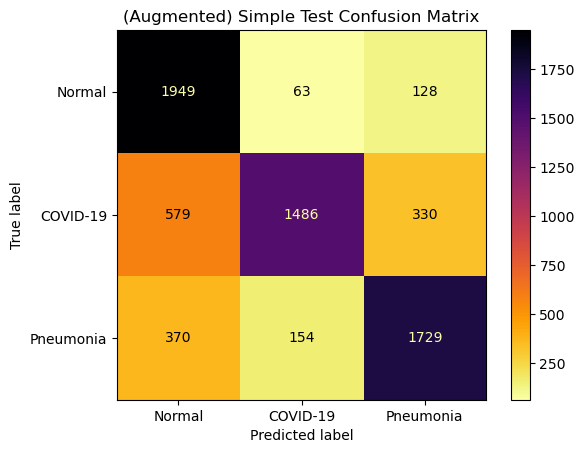

In [ ]:
# Confusion Matrix Simple Model testing
aug_smpl_cm = confusion_matrix(aug_smpl_real, aug_smpl_pred)
disp = ConfusionMatrixDisplay(aug_smpl_cm, display_labels=class_names)
disp.plot(cmap='inferno_r')
plt.title("(Augmented) Simple Test Confusion Matrix")
plt.show()

<h4 style="color:lightblue;">Complex Metrics Per Class</h4>

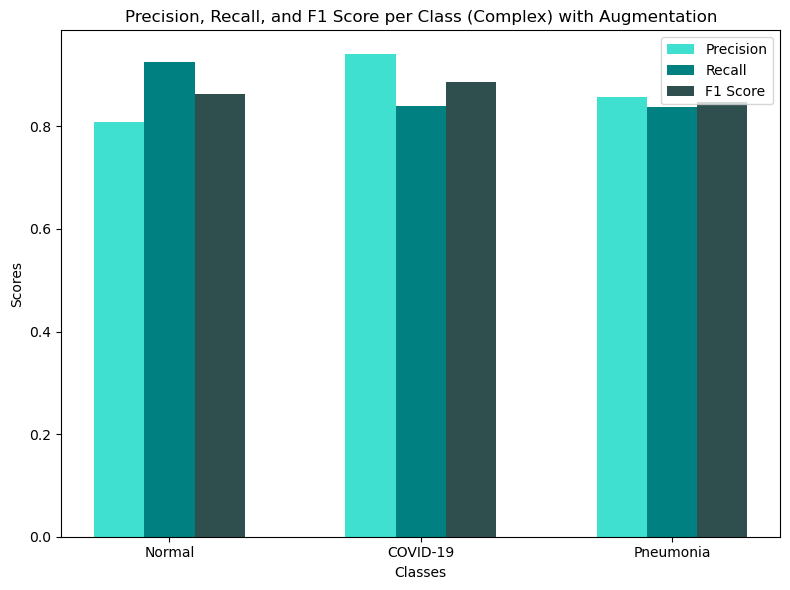

In [ ]:
# Calculating precision, recall, f1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(aug_cmplx_real, aug_cmplx_pred)

# Plotting
x = np.arange(len(class_names))
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2
# precision, recall, and f1 score bars
ax.bar(x - width, precision, width, label='Precision', color='turquoise')
ax.bar(x, recall, width, label='Recall', color='teal')
ax.bar(x + width, f1, width, label='F1 Score', color='darkslategray')
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score per Class (Complex) with Augmentation')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
plt.tight_layout()
plt.show()

<h4 style="color:lightcoral;">Simple Metrics Per Class</h4>

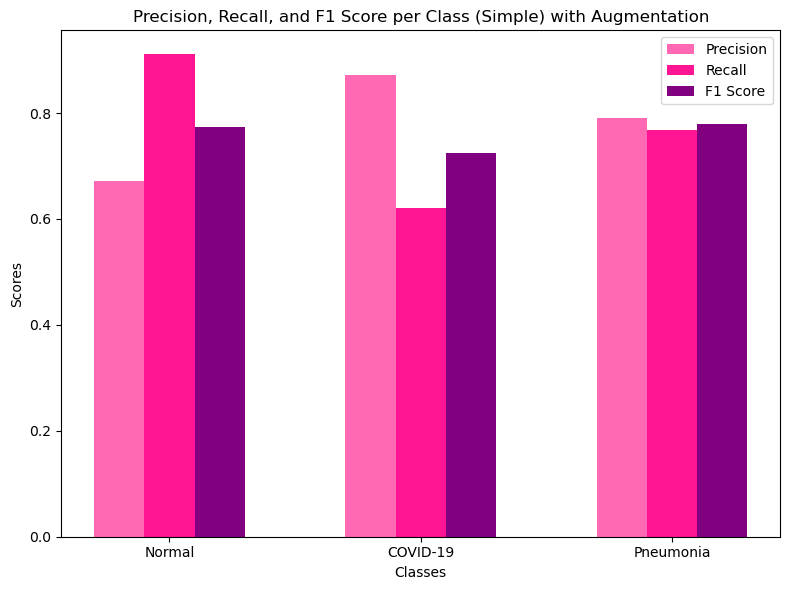

In [ ]:
# Calculating precision, recall, f1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(aug_smpl_real, aug_smpl_pred)

# Plotting
x = np.arange(len(class_names))
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2
# precision, recall, and f1 score bars
ax.bar(x - width, precision, width, label='Precision', color='hotpink')
ax.bar(x, recall, width, label='Recall', color='deeppink')
ax.bar(x + width, f1, width, label='F1 Score', color='purple')
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score per Class (Simple) with Augmentation')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
plt.tight_layout()
plt.show()

<h2 style="color:white;">Results Analysis</h2>

### Summary
- **Data Augmentation** did show marginal improvements for some classes. However, it slightly reduced performance for others.
- **Overall**, the augmentation techniques we used (*horizontal flip*, *rotation*, *cropping and resizing*) did **not** significantly boost performance across all classes, and in some cases, it reduced the accuracy.
- **Finally**, Exploring alternative augmentation techniques and parameters that are more suitable for this task may enhannce the model and boost it's performance.